# Проект: Обучение с учителем: качество модели

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. 

Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**market_file.csv**

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- **id** — номер покупателя в корпоративной базе данных.
- **Покупательская активность** — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».

*Коммуникация с клиентом*
- **Тип сервиса** — уровень сервиса, например «премиум» и «стандарт».
- **Разрешить сообщать** — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- **Маркет_актив_6_мес** — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- **Маркет_актив_тек_мес** — количество маркетинговых коммуникаций в текущем месяце.
- **Длительность** — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.

*Продуктовое поведение*
- **Акционные_покупки** — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- **Популярная_категория** — самая популярная категория товаров у покупателя за последние 6 месяцев.
- **Средний_просмотр_категорий_за_визит** — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- **Неоплаченные_продукты_штук_квартал** — общее число неоплаченных товаров в корзине за последние 3 месяца.

*Поведение на сайте*
- **Ошибка_сервиса** — число сбоев, которые коснулись покупателя во время посещения сайта.
- **Страниц_за_визит** — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

**market_money.csv**

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- **id** — номер покупателя в корпоративной базе данных.

*Финансовое поведение*
- **Период** — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- **Выручка** — сумма выручки за период.

**market_time.csv**

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- **id** — номер покупателя в корпоративной базе данных.

*Поведение на сайте*
- **Период** — название периода, во время которого зафиксировано общее время.
- **минут** — значение времени, проведённого на сайте, в минутах.

**money.csv**

Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- **id** — номер покупателя в корпоративной базе данных.

*Финансовое поведение*
- **Прибыль** — значение прибыли.

## Загрузка библиотек и данных

In [1]:
pip install phik -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install shap -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn==1.1 -q

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib==3.5.0 --use-deprecated=legacy-resolver -q

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score

from phik import phik_matrix
from phik.report import plot_correlation_matrix

import shap

from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)

In [6]:
market_file = pd.read_csv('/datasets/market_file.csv', index_col='id')
market_money = pd.read_csv('/datasets/market_money.csv', index_col='id')
market_time = pd.read_csv('/datasets/market_time.csv', index_col='id')
money = pd.read_csv('/datasets/money.csv', index_col='id', sep=';', decimal=',')

In [7]:
market_file.sample(5)

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
id,,,,,,,,,,,,
215401,Снизилась,премиум,да,3.4,5,339,0.30,Косметика и аксесуары,2,3,3,4
216587,Прежний уровень,стандарт,да,4.4,3,286,0.19,Товары для детей,4,0,7,14
216388,Прежний уровень,стандарт,да,4.3,4,356,0.15,Кухонная посуда,3,2,4,6
215846,Прежний уровень,стандарт,нет,5.7,4,169,0.14,Техника для красоты и здоровья,2,1,4,12
216393,Прежний уровень,премиум,да,3.5,4,435,0.24,Домашний текстиль,5,2,7,10


In [8]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Покупательская активность            1300 non-null   object 
 1   Тип сервиса                          1300 non-null   object 
 2   Разрешить сообщать                   1300 non-null   object 
 3   Маркет_актив_6_мес                   1300 non-null   float64
 4   Маркет_актив_тек_мес                 1300 non-null   int64  
 5   Длительность                         1300 non-null   int64  
 6   Акционные_покупки                    1300 non-null   float64
 7   Популярная_категория                 1300 non-null   object 
 8   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 9   Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 10  Ошибка_сервиса                       1300 non-null   int64  
 11  Страниц_за_визит       

In [9]:
market_money.sample(5)

,Период,Выручка
id,,
216076,предыдущий_месяц,4900.0
216158,предыдущий_месяц,4546.0
215434,текущий_месяц,5733.3
216482,предыдущий_месяц,5310.5
215546,предыдущий_месяц,3659.0


In [10]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 215348 to 216647
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Период   3900 non-null   object 
 1   Выручка  3900 non-null   float64
dtypes: float64(1), object(1)
memory usage: 91.4+ KB


In [11]:
market_time.sample(5)

,Период,минут
id,,
215885,предыдцщий_месяц,13
216596,текущий_месяц,19
215459,текущий_месяц,8
216253,текущий_месяц,13
215390,текущий_месяц,12


In [12]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 215348 to 216647
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Период  2600 non-null   object
 1   минут   2600 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 60.9+ KB


In [13]:
money.sample(5)

,Прибыль
id,
215964,3.67
216623,4.92
215569,2.34
215643,5.59
215727,3.82


In [14]:
money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Прибыль  1300 non-null   float64
dtypes: float64(1)
memory usage: 20.3 KB


В данных пропусков нет, но нужно устранить опечатки в данных и неявные дубликаты, а также переименовать столбцы и проверить наполнение столбцов. Займемся этим на следующем шаге.

##  Предобработка данных

Проверим, что у нас нет в данных дублей по покупателям.

In [15]:
dfs= [market_file, market_money, market_time, money]

for df in dfs:
    print(df.index.nunique())

1300
1300
1300
1300


Дублей по покупателям нет.

Проверим данные на неявные дубликаты.

In [16]:
for col in market_file.columns:
    display(market_file[col].value_counts())

Прежний уровень    802
Снизилась          498
Name: Покупательская активность, dtype: int64

стандарт     914
премиум      376
стандартт     10
Name: Тип сервиса, dtype: int64

да     962
нет    338
Name: Разрешить сообщать, dtype: int64

4.1    94
3.9    83
4.4    82
4.0    71
5.5    68
4.3    66
4.9    60
3.5    50
4.6    49
3.3    47
4.2    43
2.4    42
3.8    39
4.7    37
3.4    33
4.8    33
5.1    32
3.6    30
5.7    28
5.8    27
5.3    27
5.2    25
5.6    25
5.4    23
2.6    20
3.0    16
3.1    16
5.0    13
1.7    12
6.3    12
6.1    12
3.7    12
6.6    12
3.2    11
0.9    11
2.7     8
1.5     8
2.9     7
4.5     6
1.4     5
5.9     5
Name: Маркет_актив_6_мес, dtype: int64

4    669
5    323
3    308
Name: Маркет_актив_тек_мес, dtype: int64

627     7
600     7
449     7
503     6
511     6
       ..
525     1
524     1
513     1
510     1
1079    1
Name: Длительность, Length: 658, dtype: int64

0.24    93
0.30    85
0.28    83
0.17    79
0.25    72
0.14    69
0.21    64
0.13    64
0.16    62
0.23    60
0.15    49
0.94    43
0.22    34
0.40    31
0.11    31
0.99    30
0.27    27
0.35    26
0.26    24
0.95    24
0.18    23
0.20    21
0.32    20
0.12    20
0.93    19
0.29    19
0.39    18
0.98    17
0.89    16
0.33    15
0.36    11
0.90    11
0.19    11
0.31    10
0.91     5
0.34     5
0.00     3
0.44     2
0.47     1
0.75     1
0.60     1
0.74     1
Name: Акционные_покупки, dtype: int64

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: Популярная_категория, dtype: int64

3    356
2    312
4    263
5    177
1    106
6     86
Name: Средний_просмотр_категорий_за_визит, dtype: int64

1     261
2     261
3     218
4     197
5     135
0     116
6      44
7      34
8      20
9      10
10      4
Name: Неоплаченные_продукты_штук_квартал, dtype: int64

4    257
3    226
5    208
2    189
6    156
7     92
1     74
8     66
0     17
9     15
Name: Ошибка_сервиса, dtype: int64

6     127
5     115
4     112
8     109
9     108
10    104
7     102
11     92
3      76
12     73
13     61
2      58
14     53
15     36
16     21
1      20
17     19
18      7
19      5
20      2
Name: Страниц_за_визит, dtype: int64

Нужно устранить неявные дубликаты в столбце "Тип сервиса" и поработать над названиями столбцов: заменим пробел на нижнее подчеркивание, а верхний регистр переведем в нижний. 

In [17]:
market_file.columns = market_file.columns.str.lower().str.replace(' ', '_')
market_file.columns

Index(['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

In [18]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт')
market_file['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [19]:
for col in market_money.columns:
    display(market_money[col].value_counts())

препредыдущий_месяц    1300
текущий_месяц          1300
предыдущий_месяц       1300
Name: Период, dtype: int64

4729.0    8
5051.0    7
4952.0    7
0.0       6
4974.0    6
         ..
4823.5    1
5776.0    1
5001.2    1
4146.6    1
4681.4    1
Name: Выручка, Length: 2776, dtype: int64

С названиями столбцов поступим аналогично, а вот названия категорий в "Период" я заменю исходя из своих стилистических предпочтений.

In [20]:
market_money.columns = market_money.columns.str.lower().str.replace(' ', '_')
market_money.columns

Index(['период', 'выручка'], dtype='object')

In [21]:
market_money['период'] = market_money['период'].replace('препредыдущий_месяц', 'позапрошлый_месяц')\
                                                .replace('предыдущий_месяц', 'прошлый_месяц')
market_money['период'].unique()

array(['позапрошлый_месяц', 'текущий_месяц', 'прошлый_месяц'],
      dtype=object)

In [22]:
for col in market_time.columns:
    display(market_time[col].value_counts())

текущий_месяц       1300
предыдцщий_месяц    1300
Name: Период, dtype: int64

14    256
12    237
11    221
13    206
10    204
9     186
15    174
17    163
16    162
18    145
8     141
19    119
20    101
7      88
6      59
21     53
22     40
5      22
23     14
4       9
Name: минут, dtype: int64

Проведем те же манипуляции, тем более в названии периода опечатка.

In [23]:
market_time.columns = market_time.columns.str.lower()
market_time.columns

Index(['период', 'минут'], dtype='object')

In [24]:
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'прошлый_месяц')
market_time['период'].unique()

array(['текущий_месяц', 'прошлый_месяц'], dtype=object)

In [25]:
for col in money.columns:
    display(money[col].value_counts())

3.89    11
4.28     9
5.10     9
4.18     9
2.93     8
        ..
5.36     1
2.37     1
5.62     1
3.01     1
5.59     1
Name: Прибыль, Length: 400, dtype: int64

In [26]:
money.columns = money.columns.str.lower()
money.columns

Index(['прибыль'], dtype='object')

Теперь все названия столбцов в snake_case, а в категориальных признаках нет опечаток.

Количественные переменные проверим на выбросы и аномалии на шаге исследовательского анализа данных.

## Исследовательский анализ данных

### money

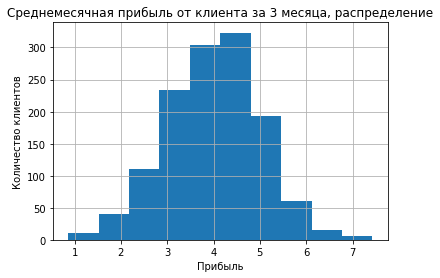

In [27]:
money.hist()
plt.title('Среднемесячная прибыль от клиента за 3 месяца, распределение')
plt.xlabel('Прибыль')
plt.ylabel('Количество клиентов');

In [28]:
money[money['прибыль']==0]

,прибыль
id,


Среднемесячная прибыль от клиента распределена нормально в промежутке от 1.5 до 7.5. Нет клиентов, которые все 3 месяца не приносили прибыль компании.

### market_money

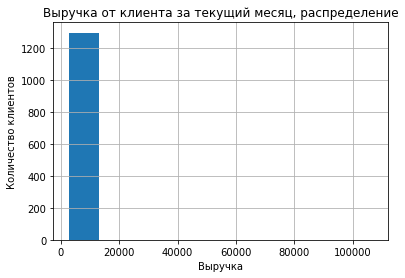

In [29]:
market_money[market_money['период'] == 'текущий_месяц'].hist()
plt.title('Выручка от клиента за текущий месяц, распределение')
plt.xlabel('Выручка')
plt.ylabel('Количество клиентов');

На графике присутвуют выбросы вправо, построим график с укороченной осью абсцисс.

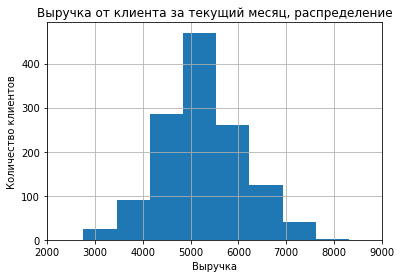

In [30]:
market_money[market_money['период'] == 'текущий_месяц'].hist(bins=150)
plt.xlim(2000, 9000)
plt.title('Выручка от клиента за текущий месяц, распределение')
plt.xlabel('Выручка')
plt.ylabel('Количество клиентов');

Выручка за текущий месяц распределена нормально на промежутке от 2500 до 8000. Посмотрим на строки с выбросами.

In [31]:
market_money[(market_money['период'] == 'текущий_месяц') & (market_money['выручка'] > 7500)].sort_values(by='выручка')

,период,выручка
id,,
216144,текущий_месяц,7547.8
215841,текущий_месяц,7557.0
215435,текущий_месяц,7605.3
215493,текущий_месяц,7799.4
215380,текущий_месяц,106862.2


Есть один выброс с крупной покупкой в текущем месяце, это аномалия, так как прибыль с этого id не отличается от остальных. Удалим этот id.

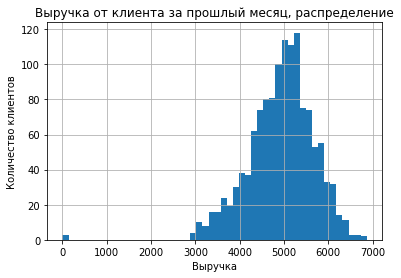

In [32]:
market_money[market_money['период'] == 'прошлый_месяц'].hist(bins=50)
plt.title('Выручка от клиента за прошлый месяц, распределение')
plt.xlabel('Выручка')
plt.ylabel('Количество клиентов');

Выручка за прошлый месяц распределена нормально на промежутке примерно от 3000 до 7000. Посмотрим ближе на выбросы.

In [33]:
market_money[(market_money['период'] == 'прошлый_месяц') & (market_money['выручка'] < 3000)].sort_values(by='выручка')

,период,выручка
id,,
215348,прошлый_месяц,0.0
215357,прошлый_месяц,0.0
215359,прошлый_месяц,0.0
215564,прошлый_месяц,2890.0
215568,прошлый_месяц,2909.0
215478,прошлый_месяц,2960.0
216634,прошлый_месяц,2970.0


3 клиента ничего не купили в прошлом месяце. Крупных покупок не было.

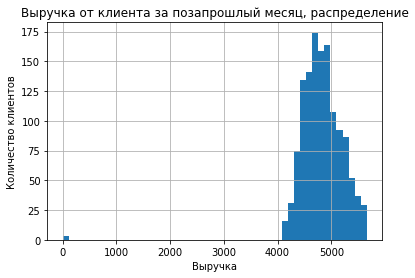

In [34]:
market_money[market_money['период'] == 'позапрошлый_месяц'].hist(bins=50)
plt.title('Выручка от клиента за позапрошлый месяц, распределение')
plt.xlabel('Выручка')
plt.ylabel('Количество клиентов');

Выручка за прошлый месяц распределена нормально на промежутке примерно от 4000 до 7000. Посмотрим ближе на выбросы.

In [35]:
market_money[(market_money['период'] == 'позапрошлый_месяц') & (market_money['выручка'] < 4100)].sort_values(by='выручка')

,период,выручка
id,,
215348,позапрошлый_месяц,0.0
215357,позапрошлый_месяц,0.0
215359,позапрошлый_месяц,0.0
215433,позапрошлый_месяц,4098.0


В позапрошлом месяце те же 3 клиента ничего не покупали, возможно они новые клиенты. Удалим их из дальнейшего анализа.

In [36]:
delete_customers = [215359, 215357, 215348, 215380]
market_money = market_money[~market_money.index.isin(delete_customers)]
market_file = market_file[~market_file.index.isin(delete_customers)]
market_time = market_time[~market_time.index.isin(delete_customers)]
market_time.shape

(2592, 2)

In [37]:
market_money_pivot = market_money.pivot_table(index=market_money.index, columns='период', values='выручка')
market_money_pivot.columns = ['выручка_ппм', 'выручка_пм', 'выручка_тм']
market_money_pivot

,выручка_ппм,выручка_пм,выручка_тм
id,,,
215349,4472.0,5216.0,4971.6
215350,4826.0,5457.5,5058.4
215351,4793.0,6158.0,6610.4
215352,4594.0,5807.5,5872.5
215353,5124.0,4738.5,5388.5
...,...,...,...
216643,4704.0,3664.0,4741.7
216644,5299.0,4729.0,5353.0
216645,5334.0,5160.0,5139.2


### market_time

In [38]:
market_time_pivot = market_time.pivot_table(index=market_time.index, columns='период', values='минут')#.droplevel(level=0, axis=1)#.sort_values(by='прошлый_месяц', ascending=False)
market_time_pivot.columns = ['время_пм', 'время_тм']
market_time_pivot

,время_пм,время_тм
id,,
215349,12,10
215350,8,13
215351,11,13
215352,8,11
215353,10,10
...,...,...
216643,14,7
216644,12,11
216645,12,18


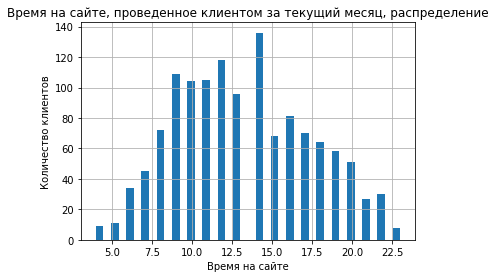

In [39]:
market_time_pivot['время_тм'].hist(bins=40)
plt.title('Время на сайте, проведенное клиентом за текущий месяц, распределение')
plt.xlabel('Время на сайте')
plt.ylabel('Количество клиентов');

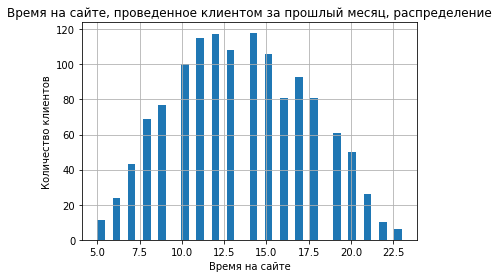

In [40]:
market_time_pivot['время_пм'].hist(bins=40)
plt.title('Время на сайте, проведенное клиентом за прошлый месяц, распределение')
plt.xlabel('Время на сайте')
plt.ylabel('Количество клиентов');

Время, которое клиенты проводят на сайте, распределено нормально в промежутке от 5 до 23 минут. Значение времени в датасете округлено до целого. 

### market_file

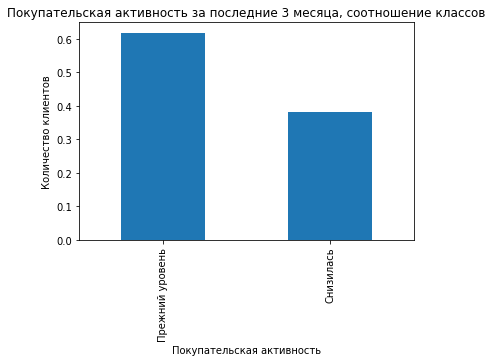

In [41]:
market_file['покупательская_активность'].value_counts(normalize=True)\
        .plot.bar(title='Покупательская активность за последние 3 месяца, соотношение классов', 
                  xlabel='Покупательская активность', ylabel='Количество клиентов');

Дисбаланс классов замечен в соотношении 60:40, будем предпринимать соответствующие действия.

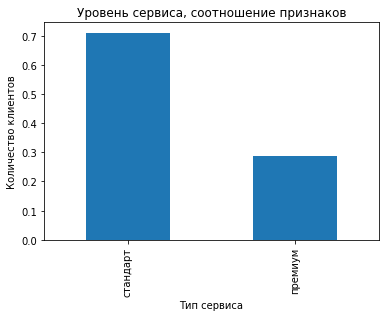

In [42]:
market_file['тип_сервиса'].value_counts(normalize=True)\
        .plot.bar(title='Уровень сервиса, соотношение признаков', 
                  xlabel='Тип сервиса', ylabel='Количество клиентов');

Очевидно, клиенты чаще выбирают стандартный сервис. Только 30% пользователей выбрали премиум сегмент.

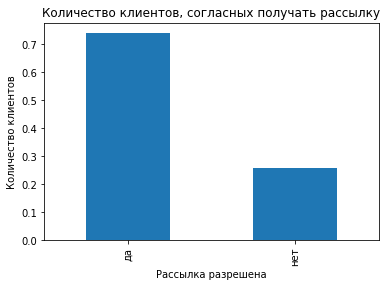

In [43]:
market_file['разрешить_сообщать'].value_counts(normalize=True)\
        .plot.bar(title='Количество клиентов, согласных получать рассылку', 
                  xlabel='Рассылка разрешена', ylabel='Количество клиентов');

Больше 70% пользователей разрешили отправлять им дополнительные предложения о товарах.

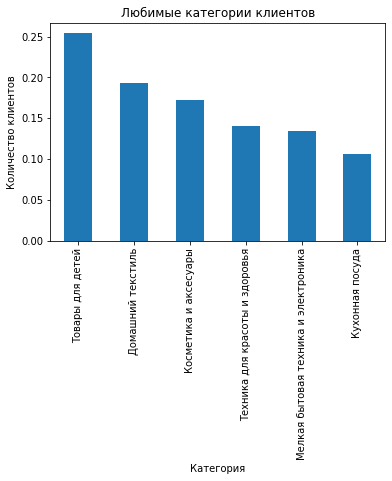

In [44]:
market_file['популярная_категория'].value_counts(normalize=True)\
        .plot.bar(title='Любимые категории клиентов', 
                  xlabel='Категория', ylabel='Количество клиентов');

Четверть покупателей за 6 месяцев чаще всего приобретали товары для детей. Реже всего у покупателей любимой становится категория кухонной посуды.

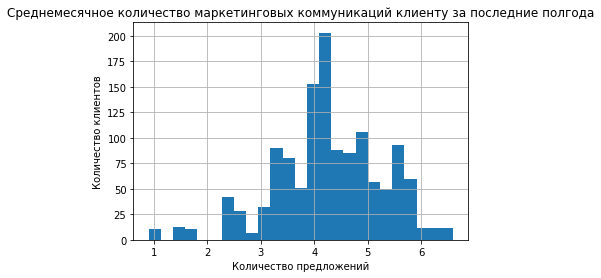

In [45]:
market_file['маркет_актив_6_мес'].hist(bins=25)
plt.title('Среднемесячное количество маркетинговых коммуникаций клиенту за последние полгода')
plt.xlabel('Количество предложений')
plt.ylabel('Количество клиентов');

Клиенты получают от 1 до 7 маркетинговых коммуникаций в месяц последние полгода. Чаще всего клиентам отправляют 4 коммуникации в месяц.

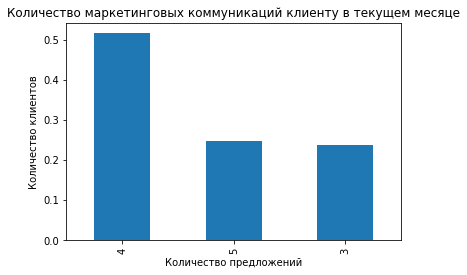

In [46]:
market_file['маркет_актив_тек_мес'].value_counts(normalize=True)\
        .plot.bar(title='Количество маркетинговых коммуникаций клиенту в текущем месяце', 
                  xlabel='Количество предложений', ylabel='Количество клиентов');

В текущем месяце 50% клиентов получили 4 коммуникации, и по 25% клиентов получили 3 и 5 коммуникаций.

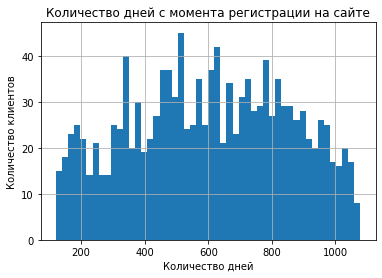

In [47]:
market_file['длительность'].hist(bins=50)
plt.title('Количество дней с момента регистрации на сайте')
plt.xlabel('Количество дней')
plt.ylabel('Количество клиентов');

In [48]:
market_file['длительность'].describe()

count    1296.000000
mean      602.967593
std       249.195823
min       121.000000
25%       409.500000
50%       606.500000
75%       806.250000
max      1079.000000
Name: длительность, dtype: float64

50% клиентов зарегистрированы на сайте уже 410-800 дней. Самый "свежий" покупатель зарегистрировался 4 месяца назад, самый "верный" зарегистрировался 3 года назад. 

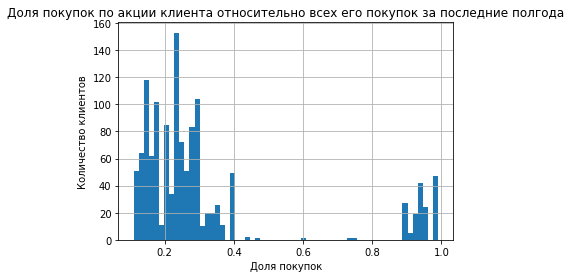

In [49]:
market_file['акционные_покупки'].hist(bins=60)
plt.title('Доля покупок по акции клиента относительно всех его покупок за последние полгода')
plt.xlabel('Доля покупок')
plt.ylabel('Количество клиентов');

In [50]:
market_file['акционные_покупки'].describe()

count    1296.000000
mean        0.320069
std         0.249159
min         0.110000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64

На графике заметно деление на сегменты клиентов по доле акционных покупок. Большая часть клиентов берут по акции 17%-40% всех своих товаров. Есть клиенты, которым не так важны скидки, их доля акционных покупок составляет до 17%. Есть сегмент "охотников за скидками". У таких клиентов за последние полгода было совершено более 89% покупок по акции.

Возможно попробовать устранить нелинейность, если перевести этот признак в категориальный. Попробуем это, когда будем выбирать и  оценивать качество работы модели.

In [51]:
market_file[market_file['акционные_покупки'] > 0.8].sort_values(by='акционные_покупки', ascending=True).head(50)

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
id,,,,,,,,,,,,
215410,Снизилась,стандарт,да,3.0,3,1048,0.89,Товары для детей,4,5,3,1
215433,Снизилась,стандарт,да,4.0,4,753,0.89,Товары для детей,2,8,3,2
215442,Снизилась,стандарт,да,2.4,4,298,0.89,Домашний текстиль,6,3,2,3
215499,Снизилась,стандарт,да,3.4,4,842,0.89,Техника для красоты и здоровья,2,8,8,3
215698,Снизилась,стандарт,да,3.5,4,685,0.89,Техника для красоты и здоровья,2,9,3,3
215598,Снизилась,премиум,да,3.0,3,449,0.89,Товары для детей,1,5,3,6
215538,Снизилась,премиум,да,1.5,5,788,0.89,Товары для детей,1,4,4,4
215627,Снизилась,стандарт,да,4.0,3,451,0.89,Домашний текстиль,2,4,3,2
215382,Снизилась,стандарт,да,4.6,4,330,0.89,Техника для красоты и здоровья,6,2,7,6


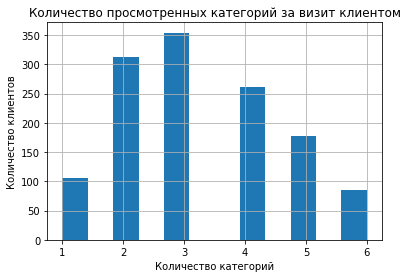

In [52]:
market_file['средний_просмотр_категорий_за_визит'].hist(bins=12)
plt.title('Количество просмотренных категорий за визит клиентом')
plt.xlabel('Количество категорий')
plt.ylabel('Количество клиентов');

В основном клиенты просматривают 2-3 категории товаров за визит за последний месяц. Примечательно, что 4-5 категорий клиенты просматривают чаще, чем 1 за визит. Наиболее редко клиенты просматривают все 6 категорий за визит.

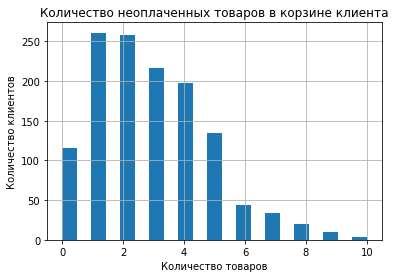

In [53]:
market_file['неоплаченные_продукты_штук_квартал'].hist(bins=21)
plt.title('Количество неоплаченных товаров в корзине клиента')
plt.xlabel('Количество товаров')
plt.ylabel('Количество клиентов');

Чаще всего у клиентов 1-4 неоплаченных товаров в корзине за последние 3 месяца. Нередко их 0 или 5. Реже не оплачено 6 и более товаров.

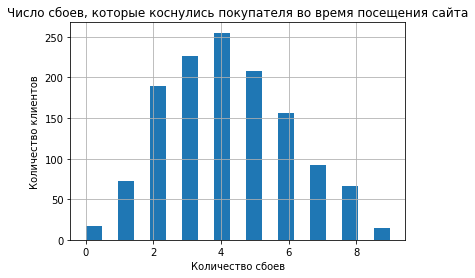

In [54]:
market_file['ошибка_сервиса'].hist(bins=19)
plt.title('Число сбоев, которые коснулись покупателя во время посещения сайта')
plt.xlabel('Количество сбоев')
plt.ylabel('Количество клиентов');

In [55]:
market_file['ошибка_сервиса'].describe()

count    1296.000000
mean        4.184414
std         1.951719
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64

Количество сбоев распределено нормально со средним в 4 сбоя на клиента. 50% клиентов столкнулись с 3-6 сбоями. В общем клиентов касались от 0 до 9 сбоев.

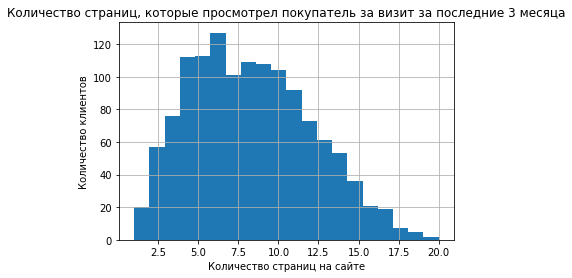

In [56]:
market_file['страниц_за_визит'].hist(bins=20)
plt.title('Количество страниц, которые просмотрел покупатель за визит за последние 3 месяца')
plt.xlabel('Количество страниц на сайте')
plt.ylabel('Количество клиентов');

In [57]:
market_file['страниц_за_визит'].describe()

count    1296.000000
mean        8.187500
std         3.978459
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64

В основном за один визит клиенты просматривают от 5 до 11 страниц с товарами. Редко покупатели заходят только на 1 страницу за визит или просматривают больше 15 страниц за раз.

**Вывод**: данные распределены нормально, нелинейность найдена только в признаке с долей покупок товаров по акции от всех покупок клиента. На этапе оценки модели и подбора параметров можно будет попробовать улучшить метрику модели, если перевести количественный признак в категориальный.

## Объединение таблиц

In [58]:
full_data = market_file.merge(market_time_pivot, left_index=True, right_index=True)\
                        .merge(market_money_pivot, left_index=True, right_index=True)

In [59]:
full_data.sample(5)

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,время_пм,время_тм,выручка_ппм,выручка_пм,выручка_тм
id,,,,,,,,,,,,,,,,,
215997,Прежний уровень,премиум,да,5.5,4,466,0.16,Товары для детей,3,4,1,13,21,15,4817.0,4770.0,4940.3
216043,Прежний уровень,стандарт,да,4.0,4,577,0.25,Товары для детей,3,3,2,14,17,12,4797.0,4488.0,4885.8
216131,Прежний уровень,стандарт,да,5.8,4,725,0.30,Товары для детей,3,4,2,6,12,23,5464.0,5169.0,5555.1
215552,Снизилась,стандарт,да,0.9,4,624,0.89,Косметика и аксесуары,1,9,5,1,12,11,4726.0,5678.5,6194.6
215978,Прежний уровень,премиум,да,4.9,5,676,0.18,Косметика и аксесуары,3,1,7,9,15,15,4948.0,5776.0,6623.6


## Корреляционный анализ

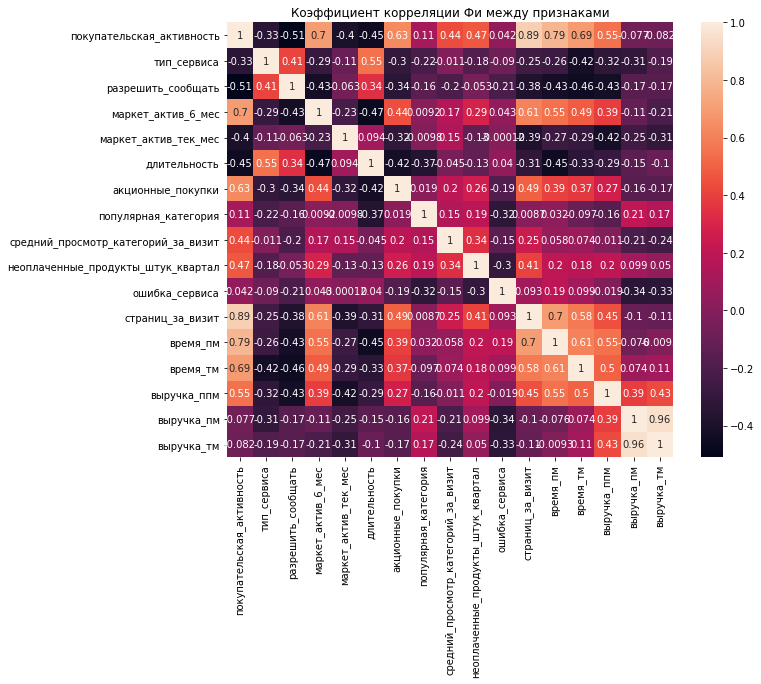

In [60]:
interval_cols = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 
                 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 
                 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 
                'страниц_за_визит', 'страниц_за_визит', 'время_пм',
                'время_тм', 'выручка_ппм', 'выручка_пм', 'выручка_тм']

corr_matrix = full_data.phik_matrix(interval_cols=interval_cols)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.corr(), annot=True)
plt.title('Коэффициент корреляции Фи между признаками')
plt.show()

In [61]:
round(corr_matrix,2)

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,время_пм,время_тм,выручка_ппм,выручка_пм,выручка_тм
покупательская_активность,1.00,0.13,0.00,0.54,0.00,0.10,0.51,0.30,0.54,0.51,0.22,0.75,0.69,0.58,0.50,0.22,0.20
тип_сервиса,0.13,1.00,0.29,0.09,0.05,0.40,0.03,0.07,0.19,0.12,0.08,0.10,0.13,0.00,0.07,0.00,0.12
разрешить_сообщать,0.00,0.29,1.00,0.00,0.05,0.25,0.01,0.07,0.07,0.20,0.02,0.04,0.04,0.00,0.00,0.08,0.06
маркет_актив_6_мес,0.54,0.09,0.00,1.00,0.08,0.00,0.28,0.15,0.21,0.29,0.14,0.40,0.36,0.33,0.32,0.16,0.04
маркет_актив_тек_мес,0.00,0.05,0.05,0.08,1.00,0.17,0.00,0.14,0.25,0.14,0.12,0.00,0.11,0.06,0.00,0.05,0.00
длительность,0.10,0.40,0.25,0.00,0.17,1.00,0.00,0.00,0.19,0.19,0.18,0.12,0.03,0.10,0.11,0.13,0.15
акционные_покупки,0.51,0.03,0.01,0.28,0.00,0.00,1.00,0.12,0.20,0.24,0.00,0.31,0.26,0.25,0.23,0.06,0.07
популярная_категория,0.30,0.07,0.07,0.15,0.14,0.00,0.12,1.00,0.23,0.25,0.00,0.16,0.20,0.09,0.04,0.25,0.24
средний_просмотр_категорий_за_визит,0.54,0.19,0.07,0.21,0.25,0.19,0.20,0.23,1.00,0.33,0.07,0.26,0.16,0.18,0.18,0.10,0.09
неоплаченные_продукты_штук_квартал,0.51,0.12,0.20,0.29,0.14,0.19,0.24,0.25,0.33,1.00,0.03,0.36,0.26,0.23,0.26,0.25,0.23


Сильнее всего с целевым признаком коррелирует информация о количестве посещенных страниц за визит и время, проведенное на сайте за прошлый месяц.

Видно, что с покупательской активностью коррелирует выручка за позапрошлый месяц сильнее, чем выручка за прошлый месяц. Выручка за текущий месяц не коррелирует вообще.

Мультиколлнеарности с целевым признаком не выявлено. Утечки данных также нет.

Между признаками сильной зависимости не замечено. Корреляция около 0.5 между временем, проведенном на сайте, и количеством просмотренных страниц за визит.

Попробуем создать другой признак, которых переведет долю акционных покупок в категориальный признак.

In [62]:
full_data.loc[(full_data['акционные_покупки'] < 0.17), 'акционные_покупки_кат'] = 'редко'
full_data.loc[(full_data['акционные_покупки'] >= 0.17), 'акционные_покупки_кат'] = 'часто'
full_data.loc[(full_data['акционные_покупки'] > 0.8), 'акционные_покупки_кат'] = 'очень часто'

In [63]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   покупательская_активность            1296 non-null   object 
 1   тип_сервиса                          1296 non-null   object 
 2   разрешить_сообщать                   1296 non-null   object 
 3   маркет_актив_6_мес                   1296 non-null   float64
 4   маркет_актив_тек_мес                 1296 non-null   int64  
 5   длительность                         1296 non-null   int64  
 6   акционные_покупки                    1296 non-null   float64
 7   популярная_категория                 1296 non-null   object 
 8   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 9   неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 10  ошибка_сервиса                       1296 non-null   int64  
 11  страниц_за_визит       

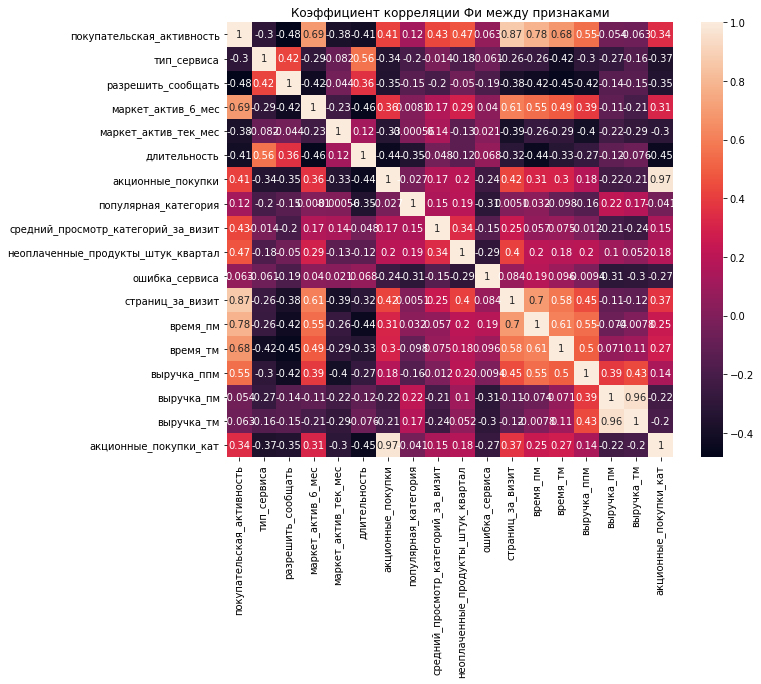

In [64]:
interval_cols = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 
                 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 
                 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 
                'страниц_за_визит', 'страниц_за_визит', 'время_пм',
                'время_тм', 'выручка_ппм', 'выручка_пм', 'выручка_тм']

corr_matrix = full_data.phik_matrix(interval_cols=interval_cols)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.corr(), annot=True)
plt.title('Коэффициент корреляции Фи между признаками')
plt.show()

In [65]:
round(corr_matrix,2)

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,время_пм,время_тм,выручка_ппм,выручка_пм,выручка_тм,акционные_покупки_кат
покупательская_активность,1.00,0.13,0.00,0.54,0.00,0.10,0.51,0.30,0.54,0.51,0.22,0.75,0.69,0.58,0.50,0.22,0.20,0.24
тип_сервиса,0.13,1.00,0.29,0.09,0.05,0.40,0.03,0.07,0.19,0.12,0.08,0.10,0.13,0.00,0.07,0.00,0.12,0.00
разрешить_сообщать,0.00,0.29,1.00,0.00,0.05,0.25,0.01,0.07,0.07,0.20,0.02,0.04,0.04,0.00,0.00,0.08,0.06,0.00
маркет_актив_6_мес,0.54,0.09,0.00,1.00,0.08,0.00,0.28,0.15,0.21,0.29,0.14,0.40,0.36,0.33,0.32,0.16,0.04,0.27
маркет_актив_тек_мес,0.00,0.05,0.05,0.08,1.00,0.17,0.00,0.14,0.25,0.14,0.12,0.00,0.11,0.06,0.00,0.05,0.00,0.00
длительность,0.10,0.40,0.25,0.00,0.17,1.00,0.00,0.00,0.19,0.19,0.18,0.12,0.03,0.10,0.11,0.13,0.15,0.00
акционные_покупки,0.51,0.03,0.01,0.28,0.00,0.00,1.00,0.12,0.20,0.24,0.00,0.31,0.26,0.25,0.23,0.06,0.07,0.99
популярная_категория,0.30,0.07,0.07,0.15,0.14,0.00,0.12,1.00,0.23,0.25,0.00,0.16,0.20,0.09,0.04,0.25,0.24,0.13
средний_просмотр_категорий_за_визит,0.54,0.19,0.07,0.21,0.25,0.19,0.20,0.23,1.00,0.33,0.07,0.26,0.16,0.18,0.18,0.10,0.09,0.27
неоплаченные_продукты_штук_квартал,0.51,0.12,0.20,0.29,0.14,0.19,0.24,0.25,0.33,1.00,0.03,0.36,0.26,0.23,0.26,0.25,0.23,0.27


Корреляция с целевым признаком и другими снизилась. Повысилась только с признаками, которые описывают поведение покупателя на сайте. Удалим созданный признак и перейдем к дальнейшему анализу.

In [66]:
full_data = full_data.drop(columns=['акционные_покупки_кат'])
full_data.shape

(1296, 17)

Построим хитмэп для каждого класса отдельно.

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable покупательская_активность for analysis 1. Dropping this column
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable покупательская_активность for analysis 1. Dropping this column
  warnings.warn(


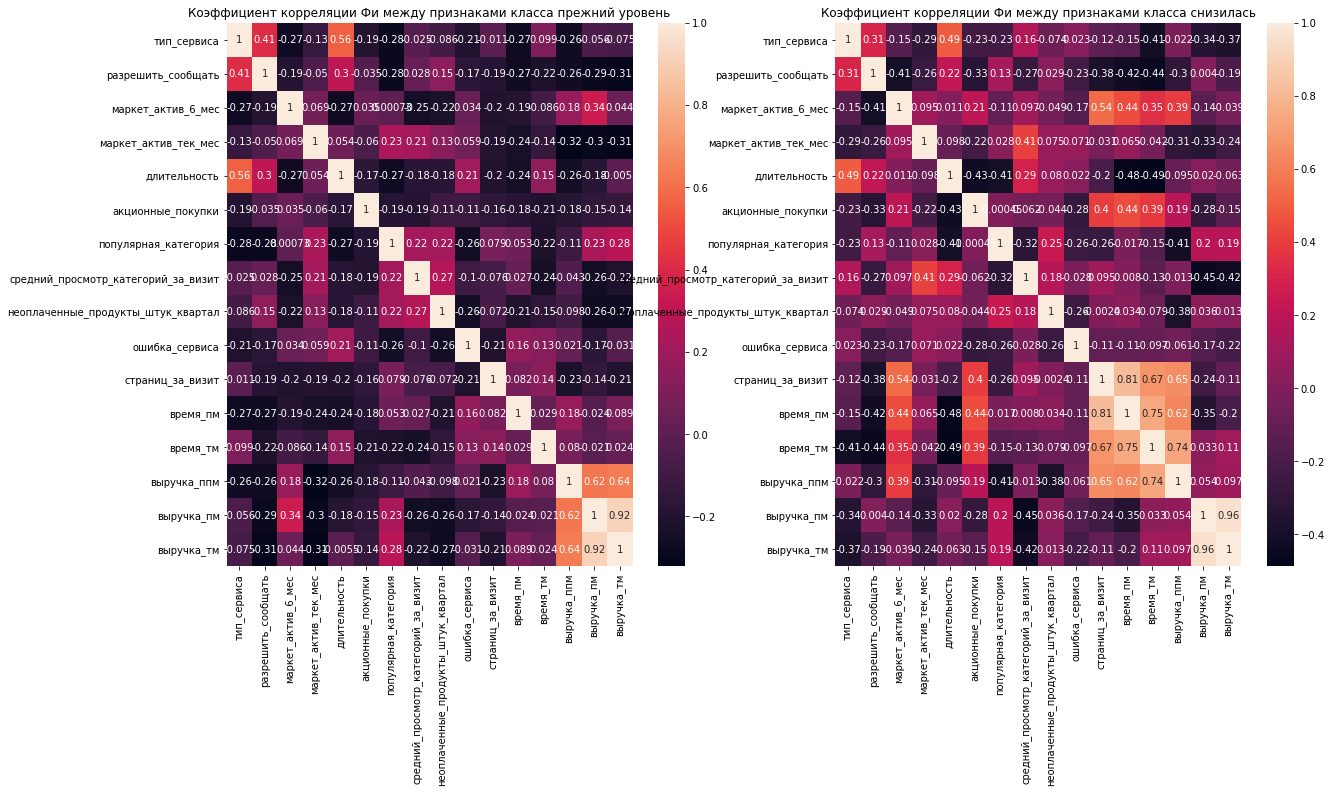

In [67]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
corr_matrix = full_data[full_data['покупательская_активность'] == 'Прежний уровень'].phik_matrix(interval_cols=interval_cols)
sns.heatmap(corr_matrix.corr(), annot=True)
plt.title('Коэффициент корреляции Фи между признаками класса прежний уровень')

plt.subplot(1, 2, 2)
corr_matrix = full_data[full_data['покупательская_активность'] == 'Снизилась'].phik_matrix(interval_cols=interval_cols)
sns.heatmap(corr_matrix.corr(), annot=True)
plt.title('Коэффициент корреляции Фи между признаками класса снизилась');

Заметно, что у класса "снизилась" выше коэффициенты корреляции между признаками.

Примечательно, что у класса "прежний уровень" высокая корреляция между выручкой в текущем месяце и в прошлом месяце - коэффициент корреляции равен 0.92.

## Использование пайплайнов

Переведем целевой признак в бинарную систему.

In [68]:
full_data['покупательская_активность'] = full_data['покупательская_активность'].map({'Прежний уровень': 0, 'Снизилась': 1})

In [69]:
full_data['покупательская_активность']

id
215349    1
215350    1
215351    1
215352    1
215353    1
         ..
216643    0
216644    0
216645    0
216646    0
216647    0
Name: покупательская_активность, Length: 1296, dtype: int64

In [1]:
full_data.sample(5)

NameError: name 'full_data' is not defined

Создадим списки с количественными и категориальными признаками.

In [71]:
X = full_data.drop(columns=['покупательская_активность'])
y = full_data['покупательская_активность']

cat_columns = X.select_dtypes(exclude='number').columns.tolist()
numeric_columns = X.select_dtypes(include='number').columns.tolist()

Бинарные признаки тип_сервиса и разрешить_сообщать проведем через OrdinalEncoder, а популярная_категория закодируем с помощью OneHotEncoder.

In [72]:
ord_columns = ['тип_сервиса', 'разрешить_сообщать']
ohe_columns = ['популярная_категория']
categories = [['стандарт', 'премиум'], ['нет', 'да']]

Разделим данные на тренировочную и тестовую выборки. Так как в целевом признаке наблюдается дисбаланс классов, воспользуемся стратификацией, а за ключевую метрику возьмем roc_auc, так как она нечувствительна к дисбалансу классов.

In [73]:
RANDOM_STATE = 5
TEST_SIZE = 0.25
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)

In [74]:
X_train.shape, X_test.shape

((972, 16), (324, 16))

Создадим пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование.

In [75]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse=False))])

Создадим пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование.

In [76]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=categories, 
                handle_unknown='use_encoded_value', unknown_value=np.nan)),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))])

Создадим общий пайплайн для подготовки данных.

In [77]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), numeric_columns)], 
    remainder='passthrough')

Создадим итоговый пайплайн: подготовка данных и модель.

In [78]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))])

Теперь создадим список словарей для подбора лучшей модели с лучшими гиперпараметрами.

In [81]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 15),
        'models__min_samples_split': range(2, 10),
        'models__min_samples_leaf': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            class_weight='balanced',
            max_iter=10)],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(probability=True, random_state=RANDOM_STATE)],
        'models__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

Для задачи выбираю RandomizedSearch, потому что много моделей и много гиперпараметров.

In [82]:
rand_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_grid,
    cv=5,
    n_iter=20,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1)

Запускаем поиск лучшей модели и способа масштабирования.

In [83]:
rand_search.fit(X_train, y_train)

display('Лучшая модель и её параметры:\n\n', rand_search.best_estimator_)
display('Метрика лучшей модели:\n\n', rand_search.best_score_)

'Лучшая модель и её параметры:\n\n'

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   O...
                                                  ['маркет_актив_6_мес',
                                                   'маркет_актив_тек_мес',
                                                   'длительность',
                                                   'акционные_покупки',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'ошибка_сервиса',
                                                   'страниц_за_визит',
                                                   'время_пм', 'время_тм',
                                                   'выручка_ппм', 'выручка_пм',
                                                   'выручка_тм'])])),
                ('models',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=9,
                                        min_samples_split=5, random_state=5))])

'Метрика лучшей модели:\n\n'

0.8674046980865162

Лучшей стала модель Дерева Решений с параметрами:
- максимальная глубина = 10
- минимальное число объектов в листе = 9
- минимальное число объектов для разделения = 9

ROC-AUC лучшей модели составил 0.87 - неплохой результат.

Для масштабирования был выбран метод нормализации с помощью StandardScaler.

Посмотрим на общие результаты подбора гиперпараметров

In [82]:
rand_results = pd.DataFrame(rand_search.cv_results_)
rand_results.sort_values(by='mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num,param_models__min_samples_split,param_models__min_samples_leaf,param_models__max_depth,param_models,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.024525,0.000534,0.008383,0.000258,StandardScaler(),9,9,10,"DecisionTreeClassifier(max_depth=10, min_sampl...","{'preprocessor__num': StandardScaler(), 'model...",0.901943,0.851184,0.805462,0.889358,0.889077,0.867405,0.035340,1
12,0.019802,0.000866,0.007991,0.000494,MinMaxScaler(),6,2,3,"DecisionTreeClassifier(max_depth=10, min_sampl...","{'preprocessor__num': MinMaxScaler(), 'models_...",0.858276,0.860844,0.857658,0.881644,0.863514,0.864387,0.008874,2
8,0.021946,0.000604,0.009449,0.000844,StandardScaler(),6,2,3,"DecisionTreeClassifier(max_depth=10, min_sampl...","{'preprocessor__num': StandardScaler(), 'model...",0.858276,0.860844,0.857658,0.881644,0.863514,0.864387,0.008874,2
5,0.019395,0.000629,0.006798,0.000413,passthrough,8,8,5,"DecisionTreeClassifier(max_depth=10, min_sampl...","{'preprocessor__num': 'passthrough', 'models__...",0.864083,0.879160,0.832151,0.868074,0.856137,0.859921,0.015744,4
0,0.025915,0.001214,0.008814,0.000807,MinMaxScaler(),9,7,13,"DecisionTreeClassifier(max_depth=10, min_sampl...","{'preprocessor__num': MinMaxScaler(), 'models_...",0.884968,0.851910,0.808108,0.881250,0.873142,0.859875,0.028305,5


Оценим модель по метрике ROC-AUC.

In [83]:
# обучаем модель на тренировочной выборке
rand_search.best_estimator_.fit(X_train, y_train)

# применяем обученную модель на тренировочной выборке
y_train_pred = rand_search.best_estimator_.predict_proba(X_train)[:,1]
print(f'Метрика ROC-AUC на тренировочной выборке: {roc_auc_score(y_train, y_train_pred)}')

# применяем обученную модель на тестовой выборке
y_test_pred = rand_search.best_estimator_.predict_proba(X_test)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Метрика ROC-AUC на тренировочной выборке: 0.966885157582832
Метрика ROC-AUC на тестовой выборке: 0.8685685483870967


Модель переобучена, потому что на тренировочной выборке показала гораздо лучший результат.

Попробуем еще раз, но на этот раз для дерева решений уменьшим значения гиперпараметров.

In [84]:
param_grid = [
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            class_weight='balanced',
            max_iter=100)],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 10),
        'models__min_samples_split': range(2, 6),
        'models__min_samples_leaf': range(2, 6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC()],
        'models__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [85]:
rand_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_grid,
    cv=5,
    n_iter=20,
    scoring='roc_auc',
    random_state=14,
    n_jobs=-1)

rand_search.fit(X_train, y_train)

display('Лучшая модель и её параметры:\n\n', rand_search.best_estimator_)
display('Метрика лучшей модели:\n\n', rand_search.best_score_)

'Лучшая модель и её параметры:\n\n'

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   O...
                                                 ('num', MinMaxScaler(),
                                                  ['маркет_актив_6_мес',
                                                   'маркет_актив_тек_мес',
                                                   'длительность',
                                                   'акционные_покупки',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'ошибка_сервиса',
                                                   'страниц_за_визит',
                                                   'время_пм', 'время_тм',
                                                   'выручка_ппм', 'выручка_пм',
                                                   'выручка_тм'])])),
                ('models',
                 LogisticRegression(C=1, class_weight='balanced',
                                    random_state=5))])

'Метрика лучшей модели:\n\n'

0.9041186434368254

На этот раз лучше всех показала себя Логистическая регрессия с C=1.

Посмотрим на топ-5 луших моделей.

In [86]:
rand_results = pd.DataFrame(rand_search.cv_results_)
rand_results.sort_values(by='mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num,param_models__min_samples_split,param_models__min_samples_leaf,param_models__max_depth,param_models,param_models__n_neighbors,...,param_models__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.143168,0.045254,0.063371,0.066671,MinMaxScaler(),NaN,NaN,NaN,"LogisticRegression(C=1, class_weight='balanced...",NaN,...,1,"{'preprocessor__num': MinMaxScaler(), 'models_...",0.914563,0.911548,0.894707,0.881306,0.918468,0.904119,0.013994,1
19,0.021403,0.001123,0.008455,0.000442,StandardScaler(),5,4,4,DecisionTreeClassifier(random_state=5),NaN,...,NaN,"{'preprocessor__num': StandardScaler(), 'model...",0.847387,0.873799,0.860586,0.865653,0.848649,0.859215,0.010076,2
14,0.023223,0.000491,0.008699,0.000169,StandardScaler(),2,4,4,DecisionTreeClassifier(random_state=5),NaN,...,NaN,"{'preprocessor__num': StandardScaler(), 'model...",0.847387,0.873799,0.860586,0.865653,0.848649,0.859215,0.010076,2
13,0.021218,0.000718,0.008299,0.000427,MinMaxScaler(),5,4,4,DecisionTreeClassifier(random_state=5),NaN,...,NaN,"{'preprocessor__num': MinMaxScaler(), 'models_...",0.847387,0.872571,0.860586,0.865653,0.848649,0.858969,0.009726,4
15,0.018678,0.000728,0.006885,0.000179,passthrough,3,4,4,DecisionTreeClassifier(random_state=5),NaN,...,NaN,"{'preprocessor__num': 'passthrough', 'models__...",0.847387,0.872571,0.860586,0.865653,0.848649,0.858969,0.009726,4


Протестируем модель на тренировочной и тестовой выборках.

In [87]:
# обучаем модель на тренировочной выборке
rand_search.best_estimator_.fit(X_train, y_train)

# применяем обученную модель на тренировочной выборке
y_train_pred = rand_search.best_estimator_.predict_proba(X_train)[:,1]
print(f'Метрика ROC-AUC на тренировочной выборке: {roc_auc_score(y_train, y_train_pred)}')

# применяем обученную модель на тестовой выборке
y_test_pred = rand_search.best_estimator_.predict_proba(X_test)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Метрика ROC-AUC на тренировочной выборке: 0.9120768609140701
Метрика ROC-AUC на тестовой выборке: 0.9066935483870967


Отлично, качество на тренировочной и тестовой выборках практически одинаковое, поэтому можно считать, что модель не переобучена. 

## Анализ важности признаков

Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP.

In [88]:
preprocessor = rand_search.best_estimator_.named_steps['preprocessor']

X_train_p = pd.DataFrame(preprocessor.transform(X_train), columns=preprocessor.get_feature_names_out())
X_test_p = pd.DataFrame(preprocessor.transform(X_test), columns=preprocessor.get_feature_names_out())

In [89]:
X_train_p.sample(5)

,ohe__популярная_категория_Косметика и аксесуары,ohe__популярная_категория_Кухонная посуда,ohe__популярная_категория_Мелкая бытовая техника и электроника,ohe__популярная_категория_Техника для красоты и здоровья,ohe__популярная_категория_Товары для детей,ord__тип_сервиса,ord__разрешить_сообщать,num__маркет_актив_6_мес,num__маркет_актив_тек_мес,num__длительность,num__акционные_покупки,num__средний_просмотр_категорий_за_визит,num__неоплаченные_продукты_штук_квартал,num__ошибка_сервиса,num__страниц_за_визит,num__время_пм,num__время_тм,num__выручка_ппм,num__выручка_пм,num__выручка_тм
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.526316,0.0,0.463874,0.931818,0.4,0.4,0.222222,0.210526,0.388889,0.473684,0.431949,0.513319,0.576269
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.596491,0.5,0.432461,0.079545,0.4,0.1,0.444444,0.473684,0.444444,0.473684,0.290096,0.548921,0.578194
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.614035,0.5,0.780105,0.068182,0.4,0.1,0.666667,0.578947,0.777778,0.315789,0.571885,0.524302,0.466265
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.526316,1.0,0.768586,1.000000,0.2,0.6,0.777778,0.263158,0.166667,0.210526,0.470288,0.868577,0.713552
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.263158,1.0,0.408377,0.943182,0.4,0.2,0.333333,0.105263,0.055556,0.263158,0.369968,0.101502,0.160375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.508772,0.0,0.549738,0.113636,0.6,0.1,0.777778,0.421053,0.777778,0.736842,0.655591,0.755839,0.783324
968,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.859649,0.5,0.287958,0.181818,0.2,0.1,0.222222,0.473684,0.722222,0.526316,0.317572,0.346926,0.274545
969,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.543860,0.5,0.661780,0.886364,0.2,0.8,0.333333,0.052632,0.166667,0.368421,0.000000,0.426714,0.436527
970,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.105263,0.0,0.391623,0.988636,0.2,0.3,0.777778,0.210526,0.500000,0.210526,0.417252,0.059841,0.341183


In [90]:
feature_importance = pd.DataFrame({'Feature': np.array(X_train_p.columns), 'Importance': np.abs(rand_search.best_estimator_.named_steps['models'].coef_).flatten()})
feature_importance.sort_values(by='Importance', ascending=False)

,Feature,Importance
15,num__время_пм,2.722206
14,num__страниц_за_визит,2.539364
10,num__акционные_покупки,2.091692
12,num__неоплаченные_продукты_штук_квартал,1.967336
7,num__маркет_актив_6_мес,1.937918
11,num__средний_просмотр_категорий_за_визит,1.907933
16,num__время_тм,1.780397
17,num__выручка_ппм,1.175262
2,ohe__популярная_категория_Мелкая бытовая техни...,0.979915
18,num__выручка_пм,0.511869


In [91]:
explainer = shap.LinearExplainer(rand_search.best_estimator_.named_steps['models'], X_train_p)
shap_values = explainer(X_train_p)
shap.plots.bar(shap_values, max_display=None)

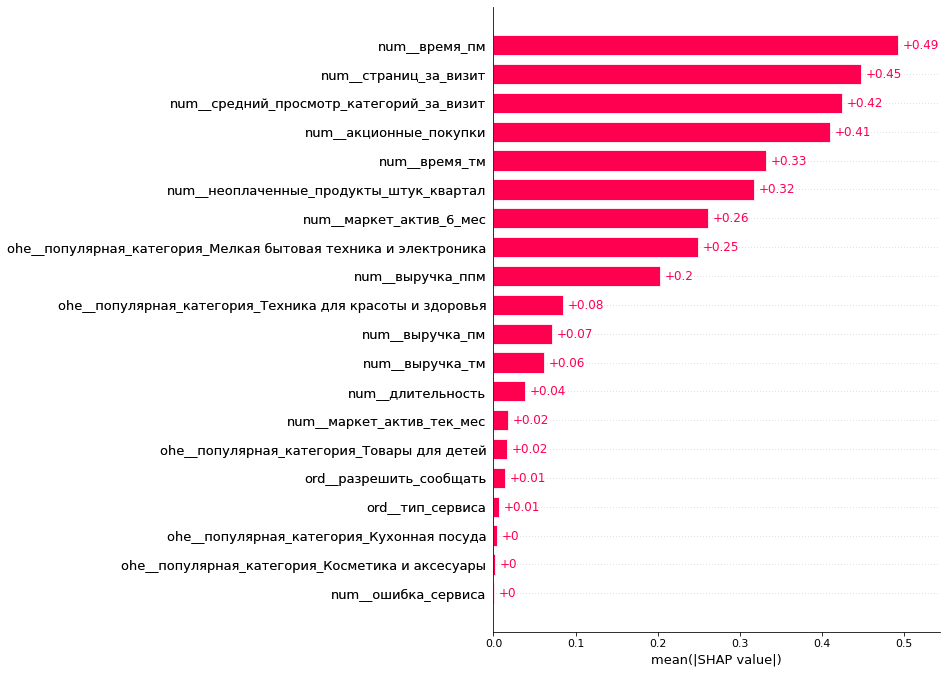

In [92]:
shap.plots.bar(shap_values, max_display=None)

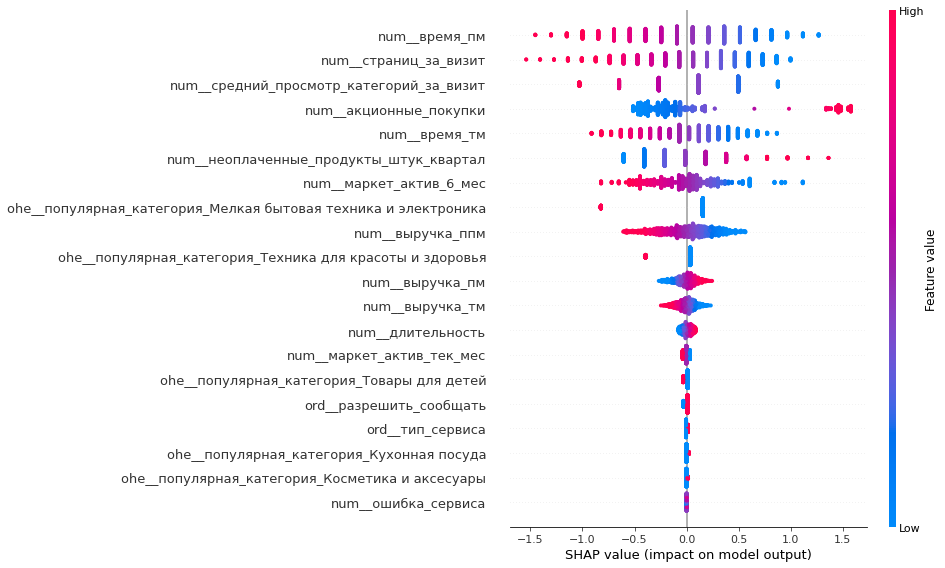

In [93]:
shap.plots.beeswarm(shap_values, max_display=None) 

**Выводы:**

Несмотря на то, что порядок важности признаков не совпадает у двух способов их вычислить, тем не менее есть топ-4 важных признака и топ-4 неважных признака у обеих способов.

Наиболее важные признаки:
- время_пм, 
- страниц_за_визит, 
- акционные_покупки,
- средний_просмотр_категорий_за_визит

Наименее важные признаки:
- маркет_актив_тек_мес
- ошибка_сервиса
- разрешить_сообщать
- тип_сервиса

Чем больше времени клиент проводит на сайте и чем больше категорий за это время просматривает, тем больше его вероятность остаться на прежнем уровне покупательской активности. Анализ важности признаков модели также показал, что чем больше за последние полгода было маркетинговых активностей в адрес клиента, тем больше была вероятность его остаться на прежнем уровне покупательской активности.

Чем больше клиент покупает по акции и чем больше у него за месяц неоплаченных товаров в корзине, тем больше его вероятность снижения покупательской активности. 

Для оценки покупательской активности не так важна выручка (главное, чтобы она была), длительность со времени регистрации клиента и количество сбоев на сайте.

## Сегментация покупателей

Добавим в таблицу информацию о вероятности попадания в определенный класс по покупательской активности, который вычислила модель, а также данные о прибыли.

In [94]:
X_segment = X.copy()
X_segment['proba'] = rand_search.best_estimator_.predict_proba(X_segment)[:,1]

In [95]:
X_segment

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,время_пм,время_тм,выручка_ппм,выручка_пм,выручка_тм,proba
id,,,,,,,,,,,,,,,,,
215349,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12,10,4472.0,5216.0,4971.6,0.902163
215350,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,8,13,4826.0,5457.5,5058.4,0.469506
215351,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11,13,4793.0,6158.0,6610.4,0.848867
215352,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,8,11,4594.0,5807.5,5872.5,0.962901
215353,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,10,10,5124.0,4738.5,5388.5,0.668360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216643,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,14,7,4704.0,3664.0,4741.7,0.124529
216644,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,12,11,5299.0,4729.0,5353.0,0.132152
216645,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,12,18,5334.0,5160.0,5139.2,0.340163


In [96]:
data = full_data.merge(X_segment.merge(X.reset_index(drop=False)['id'], left_index=True, right_on='id').set_index('id')[['proba']], 
                left_index=True, right_index=True).merge(money, right_index=True, left_on='id')

In [97]:
data

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,время_пм,время_тм,выручка_ппм,выручка_пм,выручка_тм,proba,прибыль
id,,,,,,,,,,,,,,,,,,,
215349,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12,10,4472.0,5216.0,4971.6,0.902163,4.16
215350,1,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,8,13,4826.0,5457.5,5058.4,0.469506,3.13
215351,1,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11,13,4793.0,6158.0,6610.4,0.848867,4.87
215352,1,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,8,11,4594.0,5807.5,5872.5,0.962901,4.21
215353,1,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,10,10,5124.0,4738.5,5388.5,0.668360,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216643,0,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,14,7,4704.0,3664.0,4741.7,0.124529,4.44
216644,0,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,12,11,5299.0,4729.0,5353.0,0.132152,6.11
216645,0,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,12,18,5334.0,5160.0,5139.2,0.340163,3.29


Выделим сегмент покупателей с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности. 

In [98]:
data.loc[(data['акционные_покупки'] > 0.8)&(data['покупательская_активность'] == 1)&(data['proba'] > 0.8), 'segment'] = 1

In [99]:
data['segment'].sum()

119.0

Мы выделили из 1300 покупателей 119, которые более 80% покупок совершают по акции и имеют вероятность снижения покупательской активности более 80%.

Построим графики распределения признаков для этого сегмента покупателей и сравним со всеми остальными покупателями.

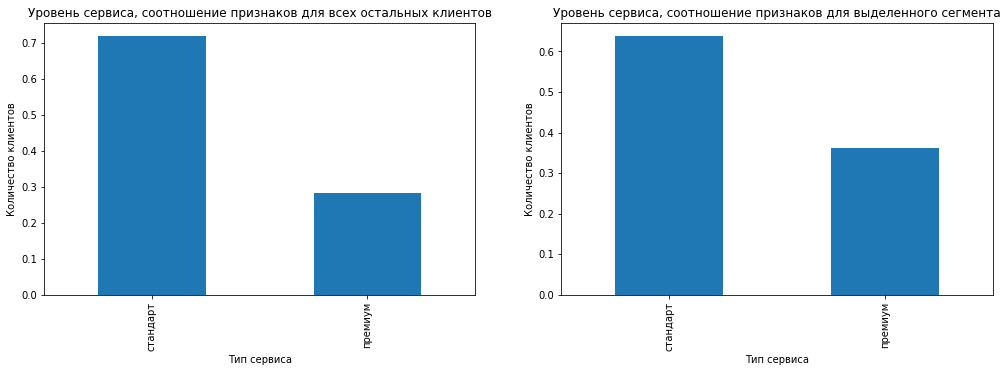

In [100]:
plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
data[data['segment'].isna()]['тип_сервиса'].value_counts(normalize=True)\
        .plot.bar(title='Уровень сервиса, соотношение признаков для всех остальных клиентов', 
                  xlabel='Тип сервиса', ylabel='Количество клиентов')

plt.subplot(1, 2, 2)
data[data['segment'] == 1]['тип_сервиса'].value_counts(normalize=True)\
        .plot.bar(title='Уровень сервиса, соотношение признаков для выделенного сегмента', 
                  xlabel='Тип сервиса', ylabel='Количество клиентов');

Соотношение типов сервисов у выделенного сегмента и остальных клиентов практически одинаковое.

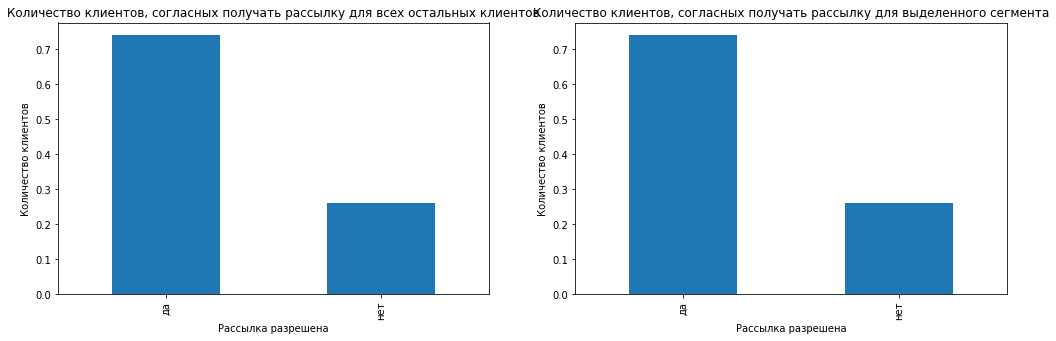

In [101]:
plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
data[data['segment'].isna()]['разрешить_сообщать'].value_counts(normalize=True)\
        .plot.bar(title='Количество клиентов, согласных получать рассылку для всех остальных клиентов', 
                  xlabel='Рассылка разрешена', ylabel='Количество клиентов')

plt.subplot(1, 2, 2)
data[data['segment'] == 1]['разрешить_сообщать'].value_counts(normalize=True)\
        .plot.bar(title='Количество клиентов, согласных получать рассылку для выделенного сегмента', 
                  xlabel='Рассылка разрешена', ylabel='Количество клиентов');

Соотношение разрешить/запретить рассылку у выделенного сегмента и остальных клиентов практически одинаковое.

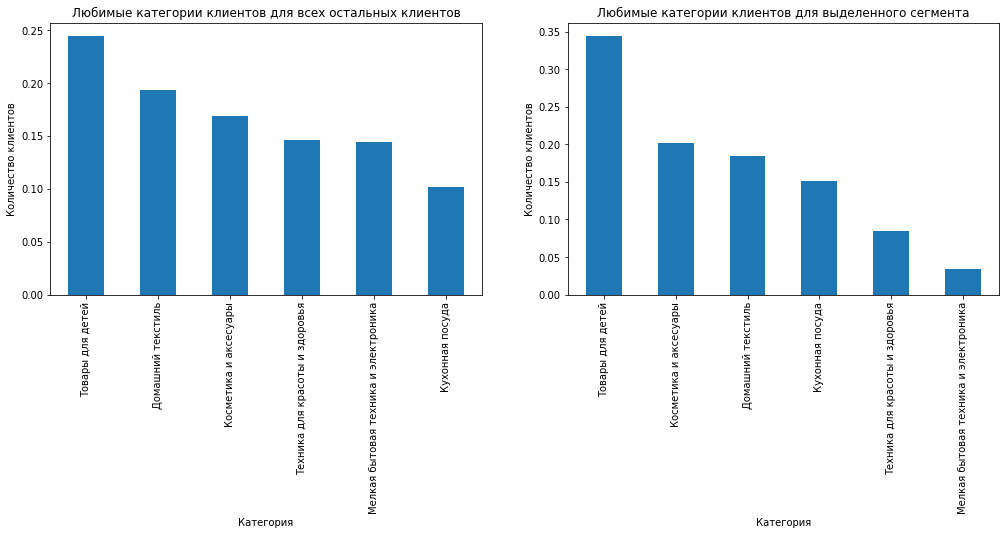

In [102]:
plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
data[data['segment'].isna()]['популярная_категория'].value_counts(normalize=True)\
        .plot.bar(title='Любимые категории клиентов для всех остальных клиентов', 
                  xlabel='Категория', ylabel='Количество клиентов')

plt.subplot(1, 2, 2)
data[data['segment'] == 1]['популярная_категория'].value_counts(normalize=True)\
        .plot.bar(title='Любимые категории клиентов для выделенного сегмента', 
                  xlabel='Категория', ylabel='Количество клиентов');

Данный сегмент покупателей редко покупает мелкую бытовую технику и электронику, а также технику для красоты и здоровья. У сегмента явно преобладает категория "товары для детей" - у 35% покупателей сегмента эта категория любимая.

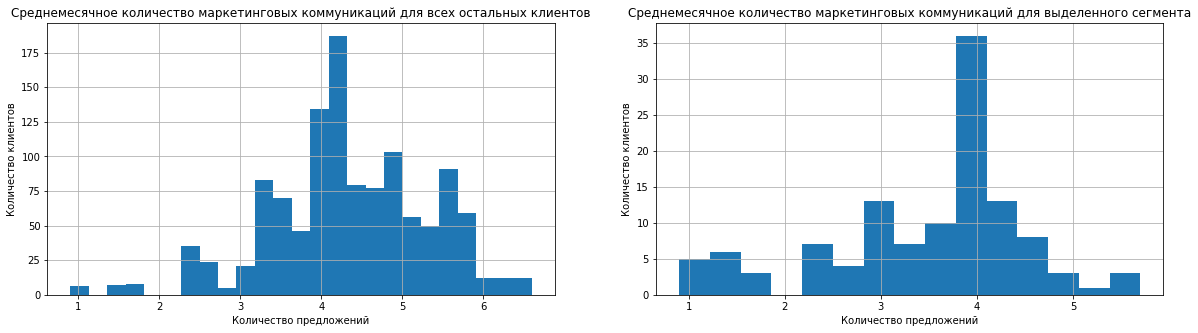

In [103]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
data[data['segment'].isna()]['маркет_актив_6_мес'].hist(bins=25)
plt.title('Среднемесячное количество маркетинговых коммуникаций для всех остальных клиентов')
plt.xlabel('Количество предложений')
plt.ylabel('Количество клиентов')

plt.subplot(1, 2, 2)
data[data['segment'] == 1]['маркет_актив_6_мес'].hist(bins=15)
plt.title('Среднемесячное количество маркетинговых коммуникаций для выделенного сегмента')
plt.xlabel('Количество предложений')
plt.ylabel('Количество клиентов');

Клиентам из выбранного сегмента реже приходит рассылка, чем остальным пользователям. Ни одному из покупателей не приходила рассылка чаще 5 раз в месяц за последние полгода, при этом другим клиентам она приходила и чаще 6 раз в месяц.

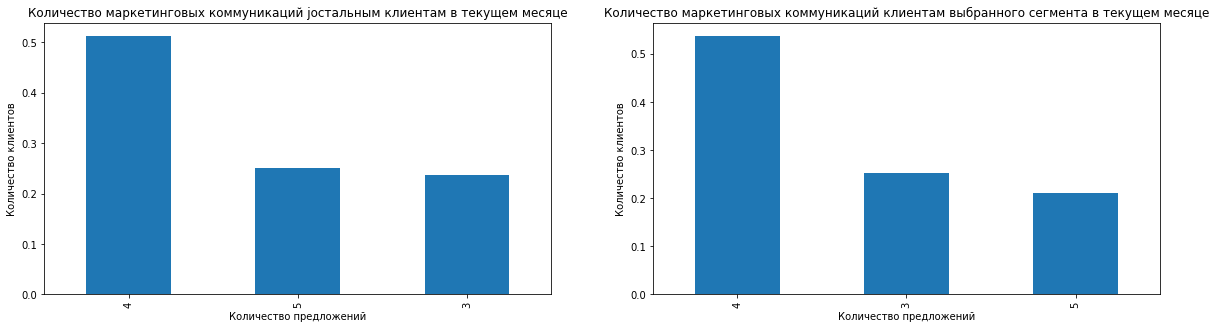

In [104]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
data[data['segment'].isna()]['маркет_актив_тек_мес'].value_counts(normalize=True)\
        .plot.bar(title='Количество маркетинговых коммуникаций jостальным клиентам в текущем месяце', 
                  xlabel='Количество предложений', ylabel='Количество клиентов')

plt.subplot(1, 2, 2)
data[data['segment'] == 1]['маркет_актив_тек_мес'].value_counts(normalize=True)\
        .plot.bar(title='Количество маркетинговых коммуникаций клиентам выбранного сегмента в текущем месяце', 
                  xlabel='Количество предложений', ylabel='Количество клиентов');

В текущем месяце клиентам из сегмента также реже приходила маркетинговая рассылка.

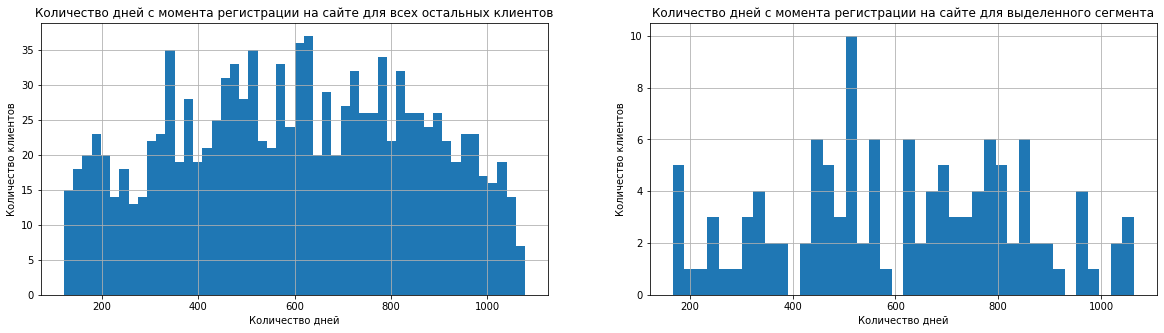

In [105]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
data[data['segment'].isna()]['длительность'].hist(bins=50)
plt.title('Количество дней с момента регистрации на сайте для всех остальных клиентов')
plt.xlabel('Количество дней')
plt.ylabel('Количество клиентов')

plt.subplot(1, 2, 2)
data[data['segment'] == 1]['длительность'].hist(bins=40)
plt.title('Количество дней с момента регистрации на сайте для выделенного сегмента')
plt.xlabel('Количество дней')
plt.ylabel('Количество клиентов');

Распределение по длительности с момента регистрации на сайте практически не отличается.

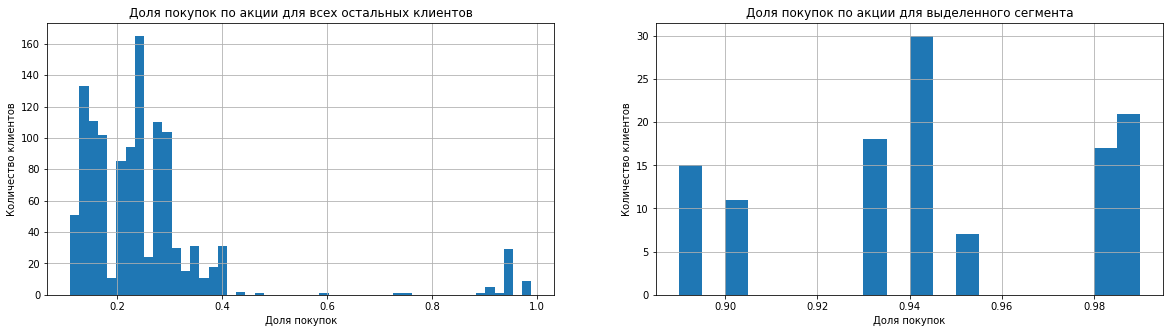

In [106]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
data[data['segment'].isna()]['акционные_покупки'].hist(bins=50)
plt.title('Доля покупок по акции для всех остальных клиентов')
plt.xlabel('Доля покупок')
plt.ylabel('Количество клиентов')

plt.subplot(1, 2, 2)
data[data['segment'] == 1]['акционные_покупки'].hist(bins=20)
plt.title('Доля покупок по акции для выделенного сегмента')
plt.xlabel('Доля покупок')
plt.ylabel('Количество клиентов');

Так как мы выделили клиентов в сегмент по доле акционных покупок, то картина очевидна. Редко остальные клиенты также покупают сколько товаров по акции.

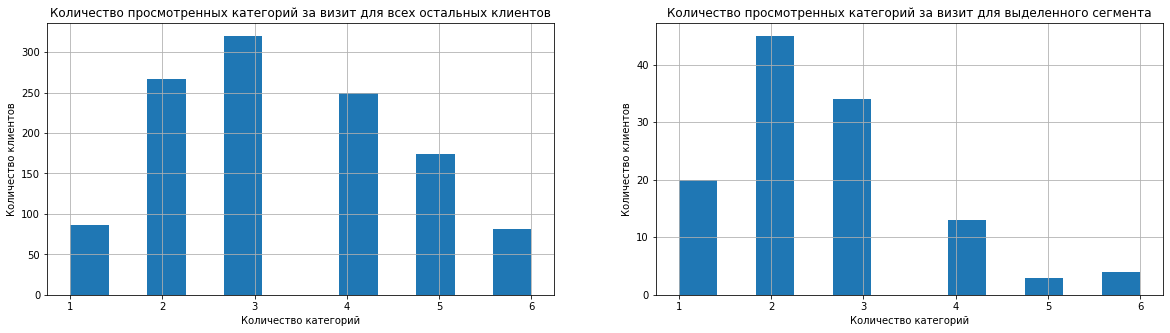

In [107]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
data[data['segment'].isna()]['средний_просмотр_категорий_за_визит'].hist(bins=12)
plt.title('Количество просмотренных категорий за визит для всех остальных клиентов')
plt.xlabel('Количество категорий')
plt.ylabel('Количество клиентов')

plt.subplot(1, 2, 2)
data[data['segment'] == 1]['средний_просмотр_категорий_за_визит'].hist(bins=12)
plt.title('Количество просмотренных категорий за визит для выделенного сегмента')
plt.xlabel('Количество категорий')
plt.ylabel('Количество клиентов');

Выделенный сегмент редко смотрит больше 3 категорий за один визит на сайт. Скорее всего у них есть конкретные товары, которые они отслеживают на скидки.

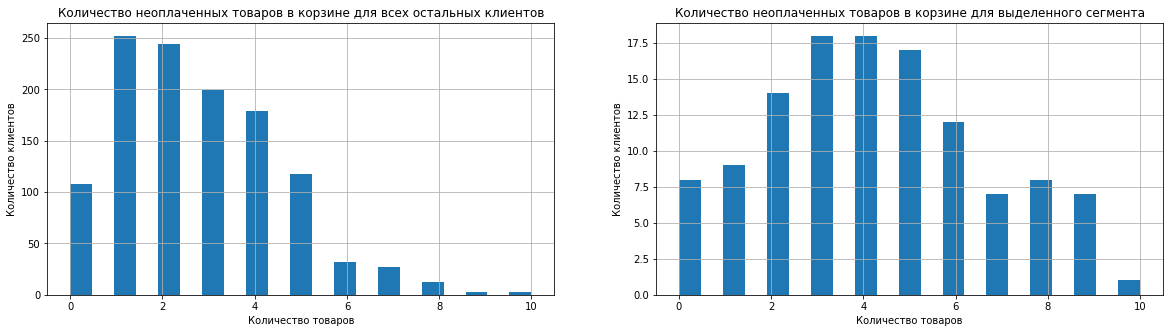

In [108]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
data[data['segment'].isna()]['неоплаченные_продукты_штук_квартал'].hist(bins=21)
plt.title('Количество неоплаченных товаров в корзине для всех остальных клиентов')
plt.xlabel('Количество товаров')
plt.ylabel('Количество клиентов')

plt.subplot(1, 2, 2)
data[data['segment'] == 1]['неоплаченные_продукты_штук_квартал'].hist(bins=21)
plt.title('Количество неоплаченных товаров в корзине для выделенного сегмента')
plt.xlabel('Количество товаров')
plt.ylabel('Количество клиентов');

Для выделенного сегмента свойственно иметь больше неоплаченных товаров в корзине. Опять же скорее всего это связано с ожиданием скидки на понравившиеся товары.

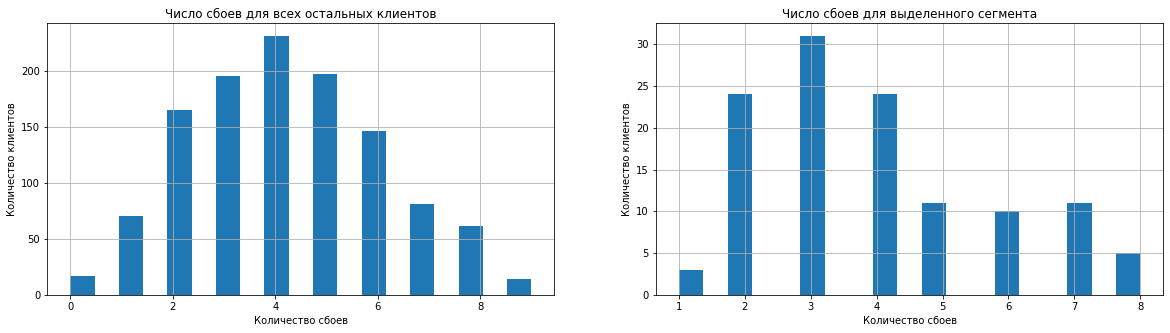

In [109]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
data[data['segment'].isna()]['ошибка_сервиса'].hist(bins=19)
plt.title('Число сбоев для всех остальных клиентов')
plt.xlabel('Количество сбоев')
plt.ylabel('Количество клиентов')

plt.subplot(1, 2, 2)
data[data['segment'] == 1]['ошибка_сервиса'].hist(bins=19)
plt.title('Число сбоев для выделенного сегмента')
plt.xlabel('Количество сбоев')
plt.ylabel('Количество клиентов');

Меньше сбоев коснулись клиентов из выделенного сегмента, в среднем на один сбой меньше, чем для остальных клиентов.

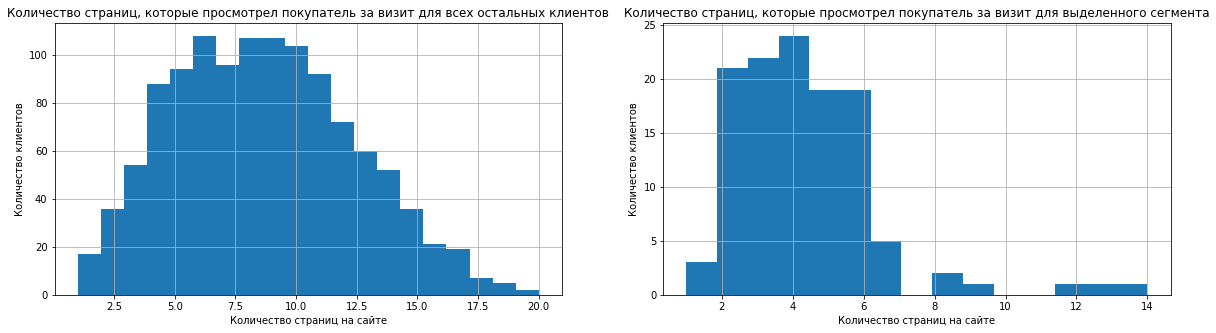

In [110]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
data[data['segment'].isna()]['страниц_за_визит'].hist(bins=20)
plt.title('Количество страниц, которые просмотрел покупатель за визит для всех остальных клиентов')
plt.xlabel('Количество страниц на сайте')
plt.ylabel('Количество клиентов')

plt.subplot(1, 2, 2)
data[data['segment'] == 1]['страниц_за_визит'].hist(bins=15)
plt.title('Количество страниц, которые просмотрел покупатель за визит для выделенного сегмента')
plt.xlabel('Количество страниц на сайте')
plt.ylabel('Количество клиентов');

Выделенный сегмент покупателей смотрит за 1 визит гораздо меньше страниц, чем остальные клиенты. Возможно не посещают страницы, где нет скидок или посещают только выбранные, по которым ждут скидку.

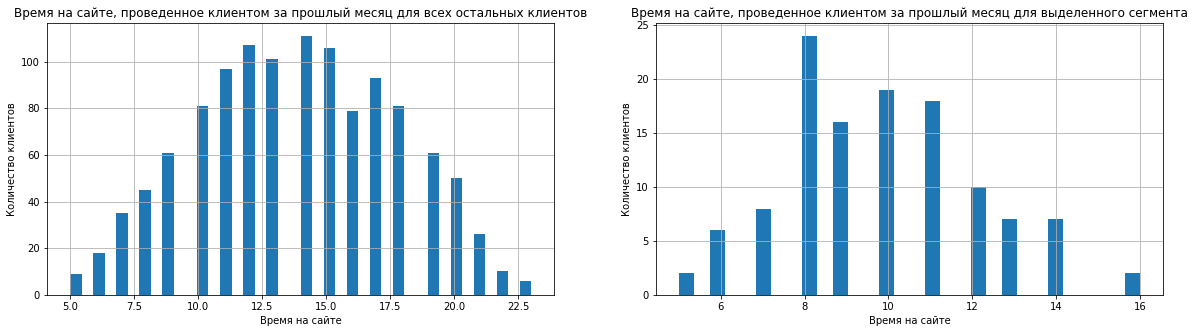

In [111]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
data[data['segment'].isna()]['время_пм'].hist(bins=40)
plt.title('Время на сайте, проведенное клиентом за прошлый месяц для всех остальных клиентов')
plt.xlabel('Время на сайте')
plt.ylabel('Количество клиентов')

plt.subplot(1, 2, 2)
data[data['segment'] == 1]['время_пм'].hist(bins=30)
plt.title('Время на сайте, проведенное клиентом за прошлый месяц для выделенного сегмента')
plt.xlabel('Время на сайте')
plt.ylabel('Количество клиентов');

Выбранный сегмент в прошлом месяце провел сайте в среднем на 4 минут меньше, чем остальные клиенты.

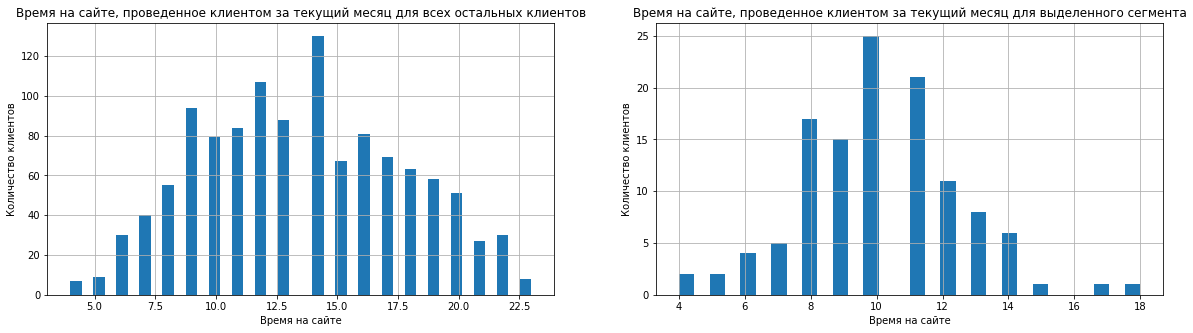

In [112]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
data[data['segment'].isna()]['время_тм'].hist(bins=40)
plt.title('Время на сайте, проведенное клиентом за текущий месяц для всех остальных клиентов')
plt.xlabel('Время на сайте')
plt.ylabel('Количество клиентов')

plt.subplot(1, 2, 2)
data[data['segment'] == 1]['время_тм'].hist(bins=30)
plt.title('Время на сайте, проведенное клиентом за текущий месяц для выделенного сегмента')
plt.xlabel('Время на сайте')
plt.ylabel('Количество клиентов');

В текущем месяце картина повторилась.

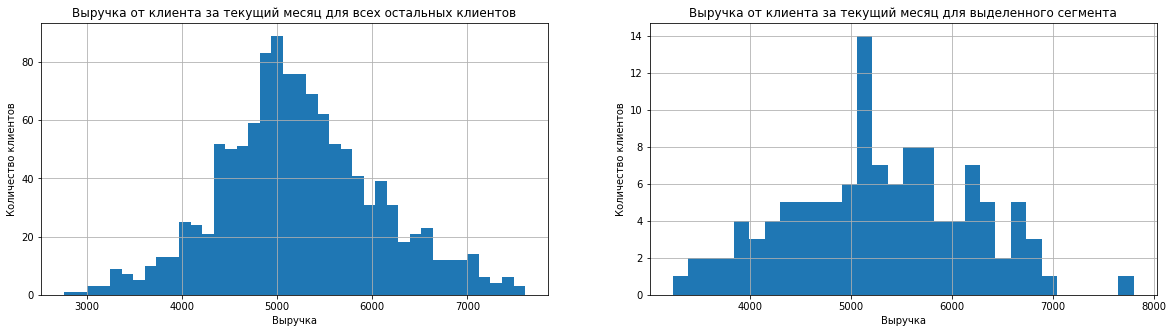

In [113]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
data[data['segment'].isna()]['выручка_тм'].hist(bins=40)
plt.title('Выручка от клиента за текущий месяц для всех остальных клиентов')
plt.xlabel('Выручка')
plt.ylabel('Количество клиентов')

plt.subplot(1, 2, 2)
data[data['segment'] == 1]['выручка_тм'].hist(bins=30)
plt.title('Выручка от клиента за текущий месяц для выделенного сегмента')
plt.xlabel('Выручка')
plt.ylabel('Количество клиентов');

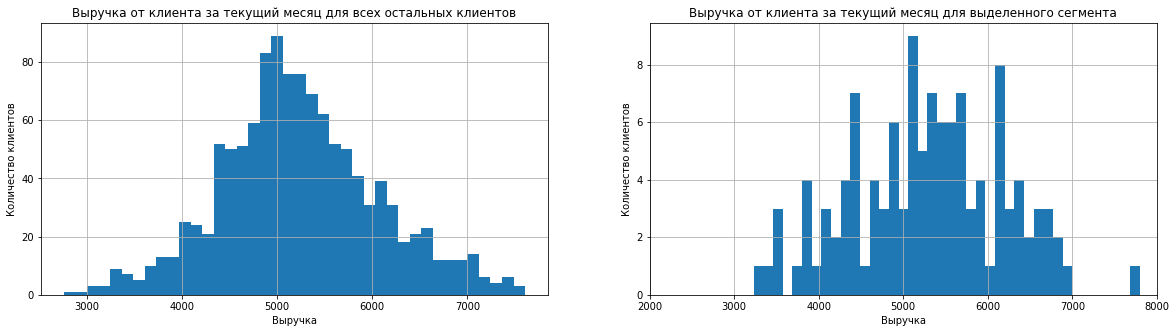

In [114]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
data[data['segment'].isna()]['выручка_тм'].hist(bins=40)
plt.title('Выручка от клиента за текущий месяц для всех остальных клиентов')
plt.xlabel('Выручка')
plt.ylabel('Количество клиентов')

plt.subplot(1, 2, 2)
data[data['segment'] == 1]['выручка_тм'].hist(bins=40)
plt.xlim(2000, 8000)
plt.title('Выручка от клиента за текущий месяц для выделенного сегмента')
plt.xlabel('Выручка')
plt.ylabel('Количество клиентов');

Распределение по выручке за текущий месяц не отличается от других клиентов.

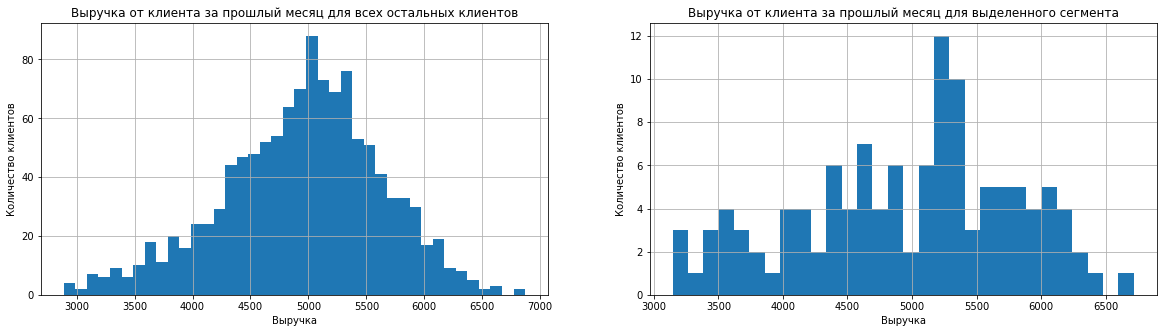

In [115]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
data[data['segment'].isna()]['выручка_пм'].hist(bins=40)
plt.title('Выручка от клиента за прошлый месяц для всех остальных клиентов')
plt.xlabel('Выручка')
plt.ylabel('Количество клиентов')

plt.subplot(1, 2, 2)
data[data['segment'] == 1]['выручка_пм'].hist(bins=30)
plt.title('Выручка от клиента за прошлый месяц для выделенного сегмента')
plt.xlabel('Выручка')
plt.ylabel('Количество клиентов');

Распределение по выручке за прошлый месяц не отличается от других клиентов.

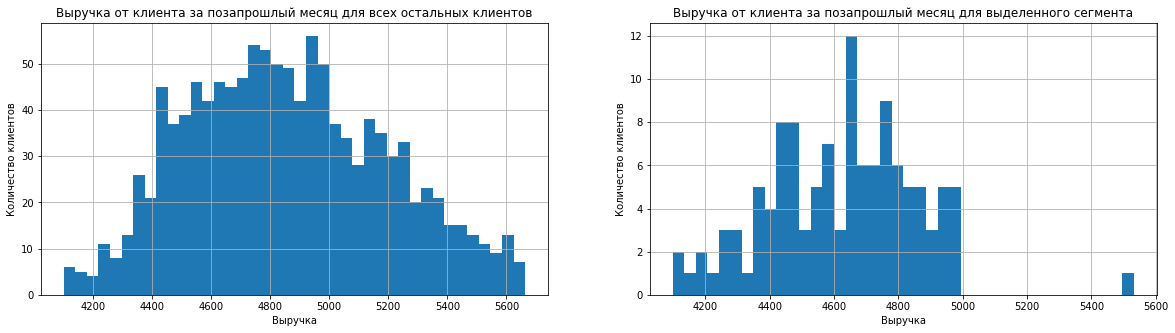

In [116]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
data[data['segment'].isna()]['выручка_ппм'].hist(bins=40)
plt.title('Выручка от клиента за позапрошлый месяц для всех остальных клиентов')
plt.xlabel('Выручка')
plt.ylabel('Количество клиентов')

plt.subplot(1, 2, 2)
data[data['segment'] == 1]['выручка_ппм'].hist(bins=40)
plt.title('Выручка от клиента за позапрошлый месяц для выделенного сегмента')
plt.xlabel('Выручка')
plt.ylabel('Количество клиентов');

Выручка за позапрошлый месяц от выделенного сегмента была несущественно меньше, чем от остальных клиентов, в среднем на 200 рублей.

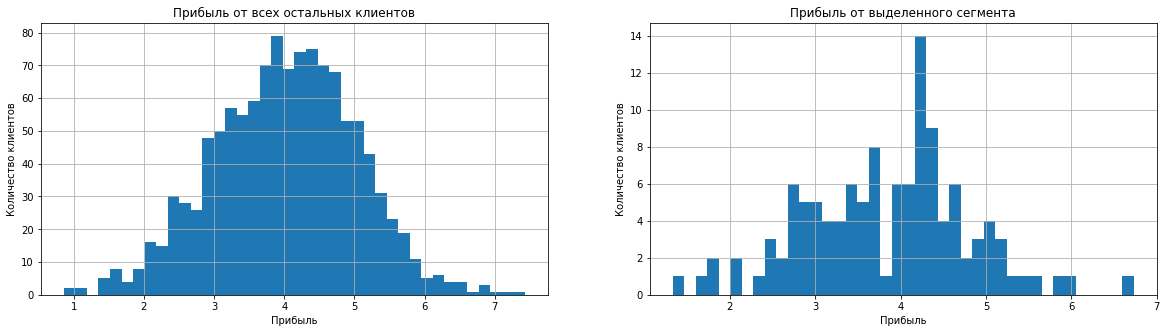

In [117]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
data[data['segment'].isna()]['прибыль'].hist(bins=40)
plt.title('Прибыль от всех остальных клиентов')
plt.xlabel('Прибыль')
plt.ylabel('Количество клиентов')

plt.subplot(1, 2, 2)
data[data['segment'] == 1]['прибыль'].hist(bins=40)
plt.title('Прибыль от выделенного сегмента')
plt.xlabel('Прибыль')
plt.ylabel('Количество клиентов');

Прибыль от выделенного сегмента на 0.2 рубля меньше в среднем на клиента.

In [118]:
data[data['segment'].isna()]['прибыль'].describe()

count    1177.000000
mean        4.013730
std         1.016068
min         0.860000
25%         3.300000
50%         4.060000
75%         4.710000
max         7.430000
Name: прибыль, dtype: float64

In [119]:
data[data['segment'] == 1]['прибыль'].describe()

count    119.000000
mean       3.839160
std        0.951259
min        1.330000
25%        3.175000
50%        4.010000
75%        4.420000
max        6.730000
Name: прибыль, dtype: float64

**Выводы:**

Был выбран сегмент покупателей, которые более 80% покупок совершают по акции у которых высокая вероятность снижения покупательской активности (более 80%).

По результатам сравнительного анализа этих клиентов с остальными выяснили, что
- у трети покупателей сегмента есть дети и траты на них составляют большую часть, при этом у остальных клиентов эта доля составляет четверть
- клиенты из сегмента крайне редко предпочитают покупать мелкую бытовую технику, электронику, а также технику для красоты и здоровья
- за один визит эти клиенты просматривают меньше страниц и меньше категорий, скорее всего они отслеживают только интересующие их товары на предмет скидки. Эту гипотезу можно подтвердить, если посмотреть частоту захода на сайт этих пользователей относительно остальных
- у выделенного сегмента чаще остаются неоплаченные товары в корзине, опять же возможно из-за ожидания скидки
- клиенты из сегмента в среднем на 4 минуты меньше проводят времени на сайте за визит
- выручка от клиента и прибыль от клиента из этого сегмента несущественно отличается от остальных клиентов, поэтому они такие же важные для нас, как и все остальные

## Выводы

Для магазина "В один клик" мы разработали модель, которая способна с достаточно высокой точностью определить, будет ли снижаться активность у выбранного клиента на основании данных за последние 3 месяца. Это модель логистической регрессии, которая умеет работать с дисбалансом классов. Она показала себя лучше всего в сравнительном анализе между моделью дерева решений, методом опорных векторов и ближайших соседей.

Перед построением модели выяснили, как ведут себя выбранные клиенты сайта:
- в среднем на сайте клиенты проводят 13 минут, просматривают 2-3 категории товаров и 5-11 страниц с товарами
- 30% клиентов выбрали премиум сервис, у остальных стандартный
- 70% клиентов разрешили присылать им маркетинговые предложения
- любимая категория четверти клиентов - товары для детей
- в среднем в месяц клиенты получают 4 маркетинговых предложения и покупают 20-40% корзины по акции
- средний клиент тратит в месяц 5000 рублей и приносит 4 рубля прибыли

Корреляционный анализ признаков не выявил утечки данных и мультиколлинеарности. Сильнее всего со снижением активности клиента коррелирует проведенное время на сайте и количество страниц за визит. Выручка за текущий месяц со снижением активности клиента не коррелирует вообще.

Анализ важности признаков для построенной модели подтвердил, что важнее всего время на сайте и количество просмотренных страниц и категорий за визит, а также акционные покупки. Наименее важными оказались количество ошибок на сайте, разрешение на маркетинговую рассылку, тип сервиса и количество маркетинговых предложений за текущий месяц.

Также выяснили, что чем больше времени клиент проводит на сайте и чем больше категорий за это время просматривает, тем больше его вероятность остаться на прежнем уровне покупательской активности. На это также положительно влияет количество маркетинговых активностей в адрес клиента за прошедшие полгода. 

Для оценки покупательской активности не так важна выручка (главное, чтобы она была), длительность со времени регистрации клиента и количество сбоев на сайте.

Наиболее подвержены риску снижения покупательской активности клиенты, у которых много неоплаченных товаров в корзине и высокая доля покупок по акции. Именно таких клиентов мы взяли на дополнительный анализ и выделили их в отдельный сегмент.

По результатам сравнительного анализа этих клиентов с остальными выяснили, что
- у трети покупателей сегмента есть дети и траты на них составляют большую часть
- клиенты из сегмента крайне редко предпочитают покупать мелкую бытовую технику, электронику и технику для красоты и здоровья
- за один визит эти клиенты просматривают меньше страниц и меньше категорий
- у выделенного сегмента чаще остаются неоплаченные товары в корзине
- клиенты из сегмента в среднем на 4 минуты меньше проводят времени на сайте за визит
- выручка от клиента и прибыль от клиента из этого сегмента несущественно отличается от остальных клиентов, поэтому они такие же важные для нас, как и все остальные

Такие клиенты скорее всего отслеживают только интересующие их товары на предмет скидки, поэтому у них меньше просмотренных страниц и категорий за визит и больше неоплаченных товаров в корзине. Для увеличения их активности могу предложить присылать им больше маркетинговых предложений со скидками на любимые категории товаров или на те товары, которые у них лежат в корзине. 